<a href="https://colab.research.google.com/github/BerkAIcelik/Predicting-tweet-categories-using-ml-dl-and-fine-tuned-models/blob/main/tweet_categorzation_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
# Google Drive'ı bağlama
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağlama
drive.mount('/content/drive')

# Veri setini yükleme
file_path = '/content/drive/MyDrive/7allV03.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı görüntüleme
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   category                                               text
0  siyaset    3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1  siyaset    mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2  siyaset    disko lar kaldırılıyor başbakan_yardımcısı ar...
3  siyaset    sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4  siyaset    erdoğan idamın bir haklılık sebebi var demek ...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0   3 milyon ile ön seçim vaadi mhp nin 10 olağan...   
1   mesut_yılmaz yüce_divan da ceza alabilirdi pr...   
2   disko lar kaldırılıyor başbakan_yardımcısı ar...   
3   sarıgül anayasa_mahkemesi ne gidiyor mustafa_...   
4   erdoğan idamın bir haklılık sebebi var demek ...   

                                      processed_text  
0  3 milyon ön seçim vaadi mhp nin 10 olağan büyü...  
1  mesut_yılmaz yüce_divan ceza alabilirdi prof d...  
2  disko lar kaldırılıyor başbakan_yardımcısı arı...  
3  sarıgül anayasa_mahkemesi gidiyor mustafa_sarı...  
4  erdoğan idamın bir haklılık sebebi var demek y...  


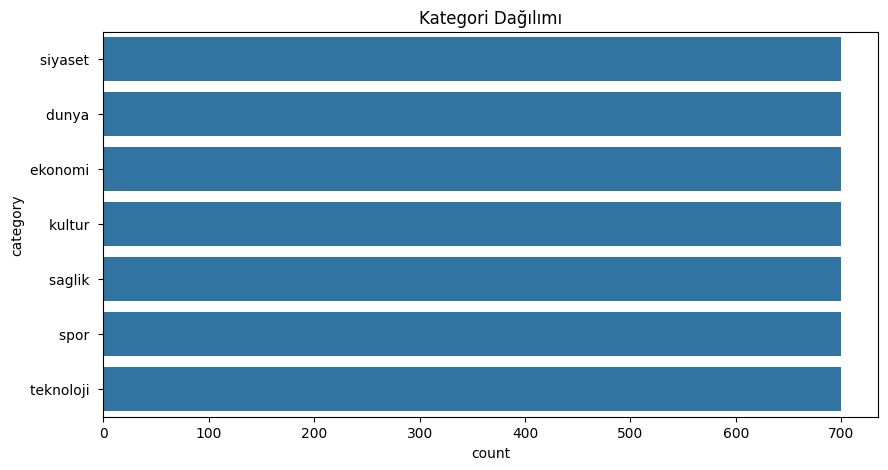

In [ ]:
import nltk
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Gerekli paketleri indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Türkçe stopwords listesi
stop_words = set(stopwords.words('turkish'))

# Lemmatizer
lemmatizer = WordNetLemmatizer()

# WordPunctTokenizer kullanımı
WPT = WordPunctTokenizer()

def preprocess_text(text):
    # Boş değerleri kontrol et
    if not isinstance(text, str):
        return ""

    # Küçük harfe çevir
    text = text.lower()

    # Noktalama işaretlerini kaldırma
    text = re.sub(r'[^\w\s]', '', text)

    # WordPunctTokenizer ile tokenizasyon
    tokens = WPT.tokenize(text)

    # Stopwords kaldırma ve lemmatizasyon
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Ön işleme işlemini text sütununa uygula
df['processed_text'] = df['text'].apply(preprocess_text)

# İlk birkaç satırı görüntüleyelim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df[['text', 'processed_text']].head())

# Kategorileri görselleştirme
plt.figure(figsize=(10,5))
sns.countplot(y=df['category'])
plt.title("Kategori Dağılımı")
plt.show()


In [ ]:
!pip install wordcloud

BoW vektörlerinin boyutu: (4900, 110656)
TF-IDF vektörlerinin boyutu: (4900, 110656)


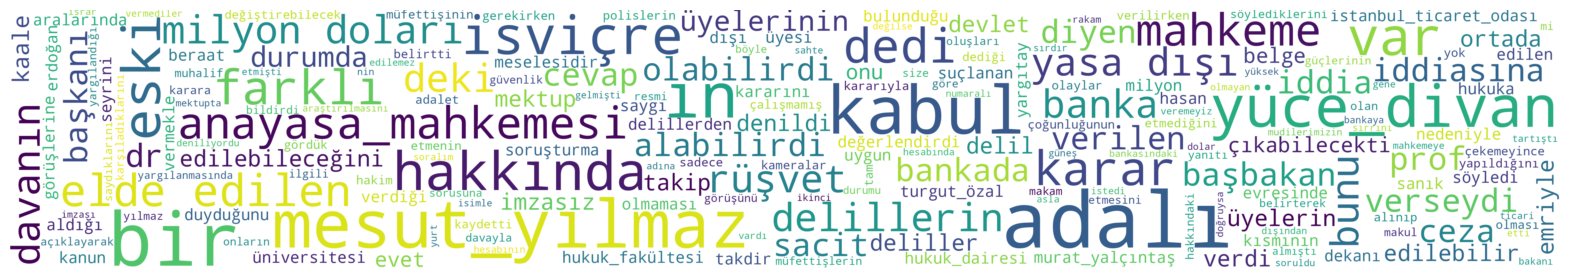

Örnek cümle: ['3', 'milyon', 'ön', 'seçim', 'vaadi', 'mhp', 'nin', '10', 'olağan', 'büyük', 'kurultayı', 'nda', 'konuşan', 'genel', 'başkan', 'adayı', 'koray_aydın', 'seçimlerden', 'önce', 'partinin', 'üye', 'sayısının', '3', 'milyona', 'ulaştırılması', 'hedefini', 'koyarak', 'ön', 'seçim', 'uygulaması', 'vaadinde', 'bulundu', 'mhp', 'nin', '10', 'olağan', 'büyük', 'kurultayı', 'nda', 'konuşan', 'genel', 'başkan', 'adayı', 'koray_aydın', 'seçimlerden', 'önce', 'partinin', 'üye', 'sayısının', '3', 'milyona', 'ulaştırılması', 'hedefini', 'koyarak', 'ön', 'seçim', 'uygulaması', 'vaadinde', 'bulundu', 'genel_başkan', 'adayı', 'koray_aydın', 'kürsüye', 'beklenirken', 'yapılan', 'tezahüratlar', 'ıslıklamalar', 'üzerine', 'divan', 'başkanı', 'tuğrul_türkeş', 'mhp', 'nin', 'genel', 'başkanlığı', 'genel', 'başkan', 'adaylığı', 'saygıdeğer', 'işlerdir', 'salondaki', 'herkes', 'ciddiye', 'almak', 'zorundadır', 'dedi', 'taşkınlıklara', 'izin', 'verilmeyeceğini', 'salonda', 'sükunet', 'sağlanmadan'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim as GN
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 1. Bag of Words (BoW)
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['processed_text'])
print("BoW vektörlerinin boyutu:", X_bow.shape)

### 2. TF-IDF

# TF-IDF modelini oluştur
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
print("TF-IDF vektörlerinin boyutu:", X_tfidf.shape)

### 3. Word2Vec Modelini Eğitme

# WordCloud ile en sık kullanılan kelimeleri görselleştirelim
sentence = df['processed_text'][1]  # Örnek bir satır seçelim
text = ''.join(map(str, sentence))
wordcloud = WordCloud(width=6000, height=1000, max_font_size=300, background_color='white').generate(text)

plt.figure(figsize=(20, 17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word2Vec modeli için cümleleri oluştur
sentences = GN.models.word2vec.LineSentence(file_path, max_sentence_length=5000)

# Modeli oluştur
model = GN.models.Word2Vec()

# Kelime dağarcığını oluştur
model.build_vocab(sentences)

# Modeli eğit
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

# Örnek bir cümledeki en olası kelime tahminlerini alalım
example_sentence = df['processed_text'][0].split()  # İlk satırın tokenlerine bakalım
predicted_words = model.predict_output_word(example_sentence)

print("Örnek cümle:", example_sentence)
print("Tahmin edilen kelimeler:", predicted_words)


In [ ]:
import gensim as GN
import numpy as np

# Tokenize edilmiş cümleler oluştur
tokenized_sentences = [text.split() for text in df['processed_text']]

# Word2Vec modelini eğit
w2v_model = GN.models.Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4)

# Her metin için ortalama Word2Vec vektörünü hesaplayan fonksiyon
def get_w2v_vector(text, model, vector_size=100):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)  # Eğer kelime yoksa sıfır vektörü dön
    return np.mean(word_vectors, axis=0)

# Tüm veri için Word2Vec vektörlerini çıkar
X_w2v = np.array([get_w2v_vector(text, w2v_model, 100) for text in df['processed_text']])

# Yeni feature setlerini ekleyelim
X_features = {
    'BoW': X_bow,
    'TF-IDF': X_tfidf,
    'Word2Vec': X_w2v
}

print("Feature Setleri Hazırlandı:", list(X_features.keys()))


Feature Setleri Hazırlandı: ['BoW', 'TF-IDF', 'Word2Vec']



Eğitiliyor: BoW
BoW Accuracy: 0.8561224489795919
BoW Precision: 0.8618253644627172
BoW Recall: 0.8561224489795919
BoW F1-Score: 0.8571118984528888
BoW AUC Score: 0.9801417416508874
Classification Report:
               precision    recall  f1-score   support

      dunya        0.68      0.79      0.73       131
    ekonomi        0.84      0.80      0.82       142
     kultur        0.86      0.94      0.89       139
     saglik        0.89      0.97      0.93       122
    siyaset        0.87      0.82      0.84       158
       spor        0.98      0.90      0.94       147
  teknoloji        0.90      0.80      0.85       141

    accuracy                           0.86       980
   macro avg       0.86      0.86      0.86       980
weighted avg       0.86      0.86      0.86       980

Confusion Matrix:
 [[103   7   4   2  11   0   4]
 [ 11 113   5   3   4   2   4]
 [  4   2 130   0   2   0   1]
 [  3   1   0 118   0   0   0]
 [ 15   3   2   5 130   0   3]
 [  7   1   5   0   2 1

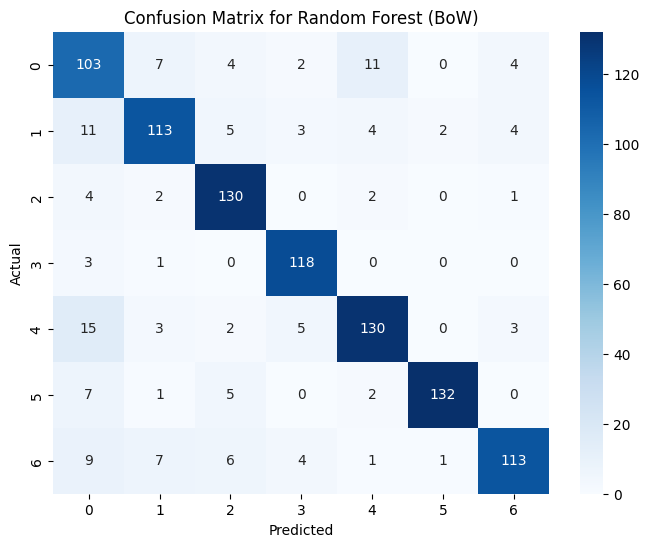

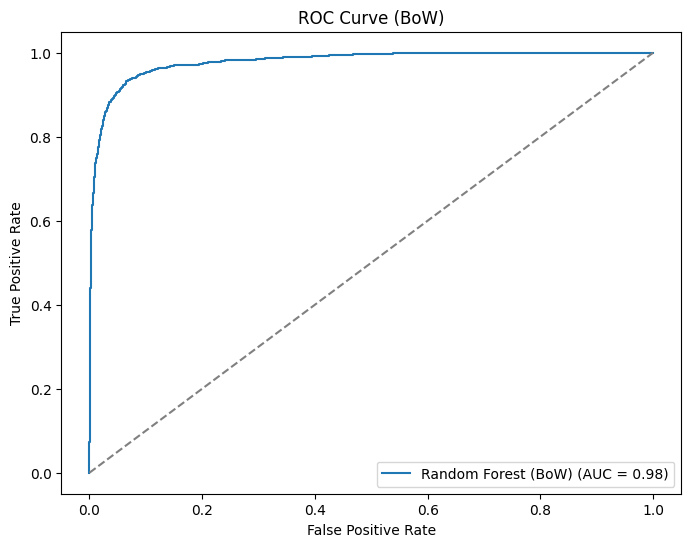


Eğitiliyor: TF-IDF
TF-IDF Accuracy: 0.8571428571428571
TF-IDF Precision: 0.8600581767024805
TF-IDF Recall: 0.8571428571428571
TF-IDF F1-Score: 0.8573961013401931
TF-IDF AUC Score: 0.9811894820582939
Classification Report:
               precision    recall  f1-score   support

      dunya        0.72      0.79      0.76       131
    ekonomi        0.82      0.79      0.81       142
     kultur        0.87      0.93      0.90       139
     saglik        0.89      0.98      0.93       122
    siyaset        0.86      0.82      0.84       158
       spor        0.98      0.89      0.93       147
  teknoloji        0.88      0.82      0.85       141

    accuracy                           0.86       980
   macro avg       0.86      0.86      0.86       980
weighted avg       0.86      0.86      0.86       980

Confusion Matrix:
 [[104   6   2   1  14   0   4]
 [ 11 112   5   3   4   2   5]
 [  4   2 129   0   2   0   2]
 [  2   1   0 119   0   0   0]
 [ 11   5   2   8 130   0   2]
 [  5

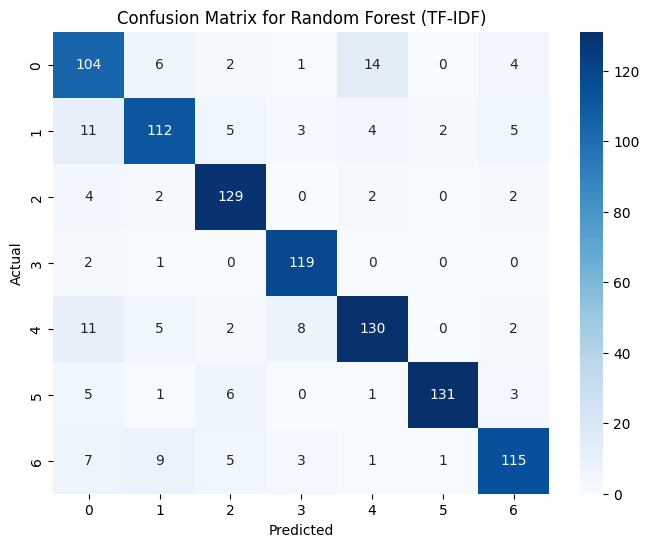

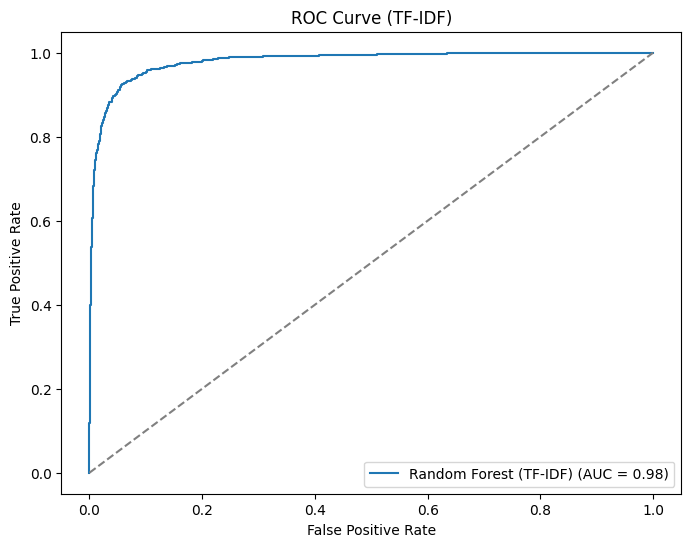


Eğitiliyor: Word2Vec
Word2Vec Accuracy: 0.6469387755102041
Word2Vec Precision: 0.6456271781468808
Word2Vec Recall: 0.6469387755102041
Word2Vec F1-Score: 0.6456911583361785
Word2Vec AUC Score: 0.9127258092458389
Classification Report:
               precision    recall  f1-score   support

      dunya        0.58      0.54      0.56       131
    ekonomi        0.64      0.61      0.62       142
     kultur        0.65      0.71      0.68       139
     saglik        0.81      0.81      0.81       122
    siyaset        0.60      0.65      0.62       158
       spor        0.68      0.70      0.69       147
  teknoloji        0.58      0.52      0.55       141

    accuracy                           0.65       980
   macro avg       0.65      0.65      0.65       980
weighted avg       0.65      0.65      0.65       980

Confusion Matrix:
 [[ 71  11   6   1  21  11  10]
 [ 13  87   7   8  11   8   8]
 [  7   4  98   2   7   5  16]
 [  1   5   1  99  11   1   4]
 [ 20   4   5   6 102  1

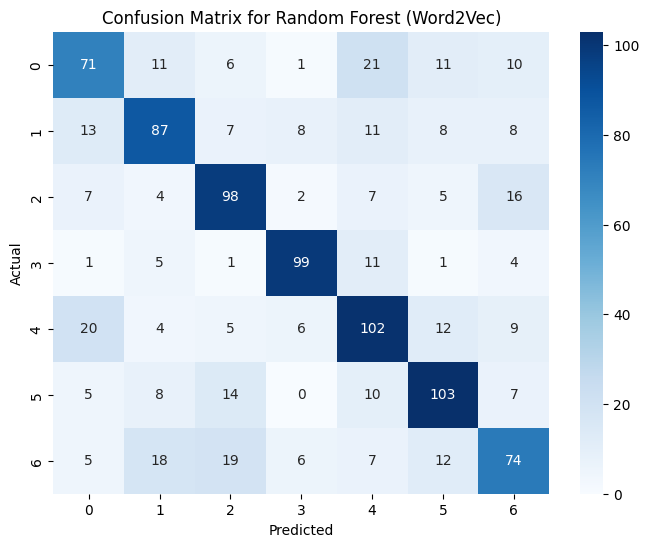

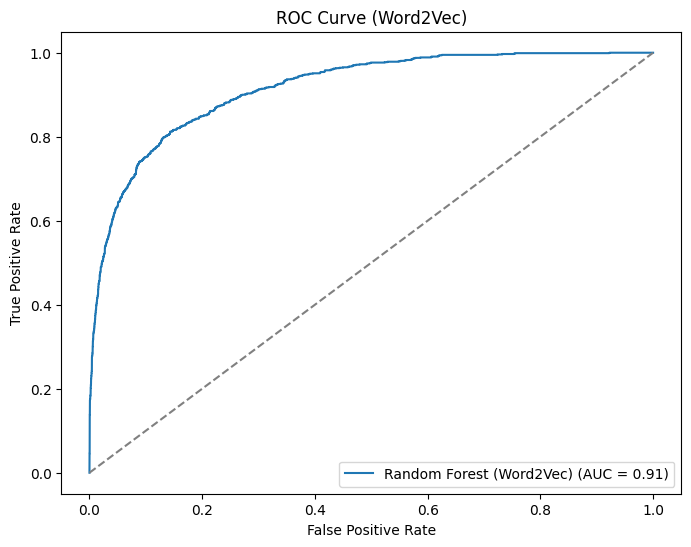


Final Sonuçlar:
Random Forest - BoW: {'Accuracy': 0.8561224489795919, 'Precision': 0.8618253644627172, 'Recall': 0.8561224489795919, 'F1-Score': 0.8571118984528888, 'AUC Score': 0.9801417416508874}
Random Forest - TF-IDF: {'Accuracy': 0.8571428571428571, 'Precision': 0.8600581767024805, 'Recall': 0.8571428571428571, 'F1-Score': 0.8573961013401931, 'AUC Score': 0.9811894820582939}
Random Forest - Word2Vec: {'Accuracy': 0.6469387755102041, 'Precision': 0.6456271781468808, 'Recall': 0.6469387755102041, 'F1-Score': 0.6456911583361785, 'AUC Score': 0.9127258092458389}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

# Feature setleri
feature_sets = {
    'BoW': X_bow,
    'TF-IDF': X_tfidf,
    'Word2Vec': X_w2v
}

# Tüm feature setleri için Random Forest modeli çalıştır
results = {}
for feature_name, X in feature_sets.items():
    print(f"\nEğitiliyor: {feature_name}")

    # Veriyi eğitim ve test kümelerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)

    # Convert X_train to float32 using toarray() if it's a sparse matrix
    if isinstance(X_train, scipy.sparse.spmatrix):
        X_train = X_train.toarray().astype('float32')
    if isinstance(X_test, scipy.sparse.spmatrix):
        X_test = X_test.toarray().astype('float32')

    # Random Forest modelini oluştur ve eğit
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=10,
        random_state=42)
    rf_model.fit(X_train, y_train)

    # Modelin tahminlerini al
    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)  # Tüm sınıfların olasılıklarını al

    # Model performansını değerlendirme
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()

    # Çok sınıflı AUC hesaplaması için doğru formatı sağlıyoruz
    y_test_bin = pd.get_dummies(y_test).values  # Çok sınıflı etiketi binary formata çeviriyoruz
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    results[feature_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "AUC Score": auc
    }

    print(f"{feature_name} Accuracy: {accuracy}")
    print(f"{feature_name} Precision: {precision}")
    print(f"{feature_name} Recall: {recall}")
    print(f"{feature_name} F1-Score: {f1_score}")
    print(f"{feature_name} AUC Score: {auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Confusion Matrix Görselleştirme
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Random Forest ({feature_name})')
    plt.show()

    # ROC Curve Çizimi
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())  # Çok sınıflı ROC eğrisi için uygun format
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'Random Forest ({feature_name}) (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({feature_name})')
    plt.legend()
    plt.show()

# Sonuçları Yazdır
# Sonuçları Yazdır
print("\nFinal Sonuçlar:")
for feature_name, metrics in results.items():
    print(f"Random Forest - {feature_name}: {metrics}")


In [ ]:
!pip install xgboost

Kategori Kodlama Haritası:
0: dunya 
1: ekonomi 
2: kultur 
3: saglik 
4: siyaset 
5: spor 
6: teknoloji 

Eğitiliyor: BoW


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:45:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


BoW Accuracy: 0.8683673469387755
BoW Precision: 0.8696696858971165
BoW Recall: 0.8683673469387755
BoW F1-Score: 0.8684256796516439
BoW AUC Score: 0.9824057260871021
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       131
           1       0.80      0.80      0.80       142
           2       0.88      0.92      0.90       139
           3       0.89      0.95      0.92       122
           4       0.89      0.81      0.85       158
           5       0.98      0.93      0.95       147
           6       0.85      0.86      0.86       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

Confusion Matrix:
 [[107   7   4   4   6   0   3]
 [  5 114   5   3   5   2   8]
 [  4   2 128   0   1   0   4]
 [  1   1   0 116   1   0   3]
 [ 13   8   3   3 128   0   3]
 [  3   2   2   1   2 137   0]
 [  3   9

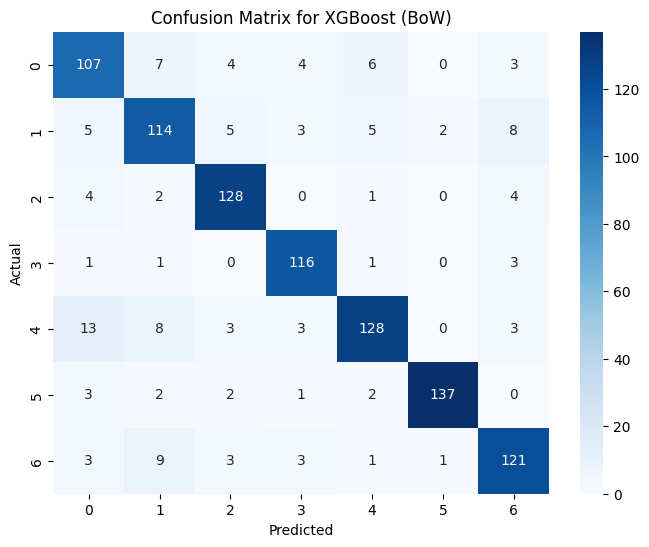

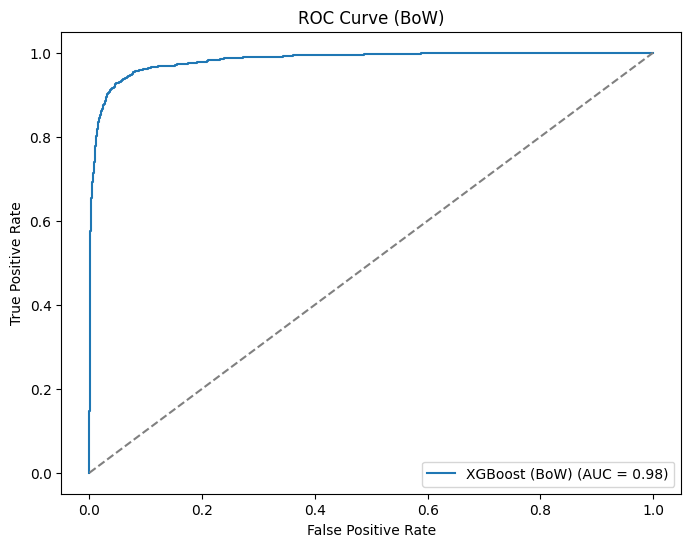


Eğitiliyor: TF-IDF


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


TF-IDF Accuracy: 0.8673469387755102
TF-IDF Precision: 0.8687170065675405
TF-IDF Recall: 0.8673469387755102
TF-IDF F1-Score: 0.8671452222489296
TF-IDF AUC Score: 0.9803830699092868
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       131
           1       0.85      0.79      0.82       142
           2       0.86      0.93      0.89       139
           3       0.89      0.95      0.92       122
           4       0.88      0.82      0.85       158
           5       0.96      0.92      0.94       147
           6       0.83      0.86      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

Confusion Matrix:
 [[108   5   5   2   7   0   4]
 [  6 112   3   4   5   3   9]
 [  3   2 129   0   1   0   4]
 [  2   0   0 116   1   0   3]
 [ 13   4   3   4 129   1   4]
 [  2   1   5   2   2 135

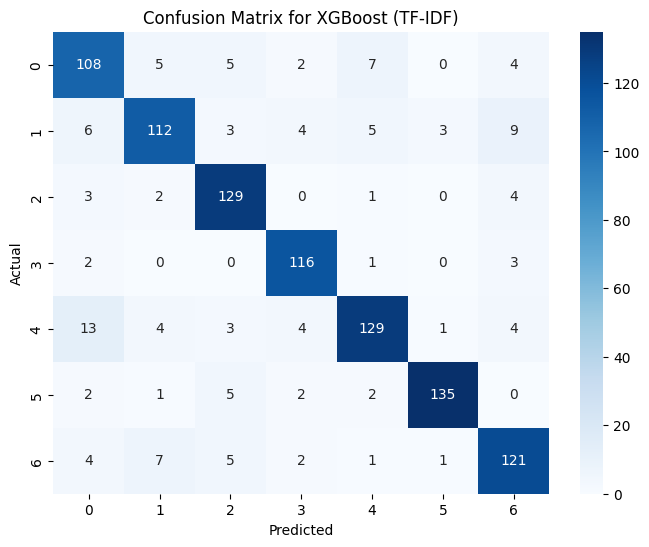

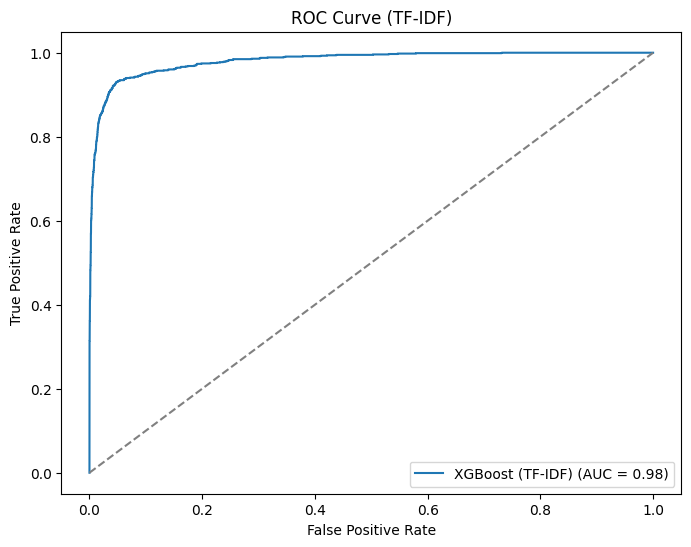


Eğitiliyor: Word2Vec


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:57:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Word2Vec Accuracy: 0.6755102040816326
Word2Vec Precision: 0.6749910160442492
Word2Vec Recall: 0.6755102040816326
Word2Vec F1-Score: 0.6750556829046684
Word2Vec AUC Score: 0.9278470655156413
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56       131
           1       0.63      0.65      0.64       142
           2       0.72      0.71      0.71       139
           3       0.83      0.85      0.84       122
           4       0.68      0.64      0.66       158
           5       0.74      0.77      0.76       147
           6       0.58      0.57      0.58       141

    accuracy                           0.68       980
   macro avg       0.68      0.68      0.68       980
weighted avg       0.67      0.68      0.68       980

Confusion Matrix:
 [[ 73  10   6   1  19   8  14]
 [ 11  92   6   8   9   7   9]
 [ 10   4  98   0   2   6  19]
 [  4   5   1 104   4   1   3]
 [ 18   9   3   6 101  12   9]
 [  4   8   8  

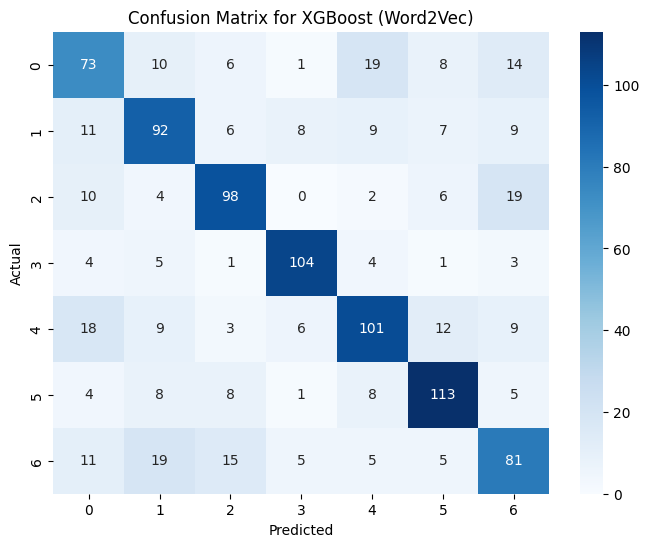

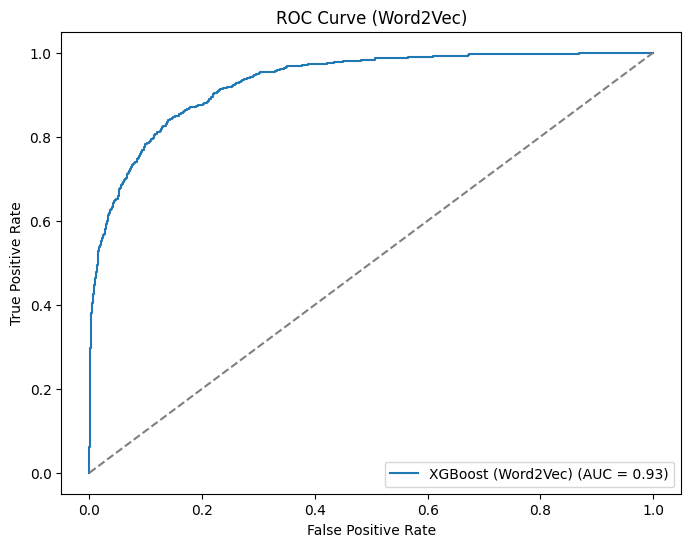


Final Sonuçlar:
XGBoost - BoW: {'Accuracy': 0.8683673469387755, 'Precision': 0.8696696858971165, 'Recall': 0.8683673469387755, 'F1-Score': 0.8684256796516439, 'AUC Score': 0.9824057260871021}
XGBoost - TF-IDF: {'Accuracy': 0.8673469387755102, 'Precision': 0.8687170065675405, 'Recall': 0.8673469387755102, 'F1-Score': 0.8671452222489296, 'AUC Score': 0.9803830699092868}
XGBoost - Word2Vec: {'Accuracy': 0.6755102040816326, 'Precision': 0.6749910160442492, 'Recall': 0.6755102040816326, 'F1-Score': 0.6750556829046684, 'AUC Score': 0.9278470655156413}


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

# Kategori sütununu sayısallaştır
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Kategori etiketlerini ve karşılık gelen numaralarını yazdır
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Kategori Kodlama Haritası:")
for category, code in category_mapping.items():
    print(f"{code}: {category}")

# Feature setleri
feature_sets = {
    'BoW': X_bow,
    'TF-IDF': X_tfidf,
    'Word2Vec': X_w2v
}

# Tüm feature setleri için XGBoost modeli çalıştır
#results = {}
for feature_name, X in feature_sets.items():
    print(f"\nEğitiliyor: {feature_name}")

    # Veriyi eğitim ve test kümelerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, df['category_encoded'], test_size=0.2, random_state=42)

    # Convert X_train to float32 using toarray() if it's a sparse matrix
    if isinstance(X_train, scipy.sparse.spmatrix):
        X_train = X_train.toarray().astype('float32')
    if isinstance(X_test, scipy.sparse.spmatrix):
        X_test = X_test.toarray().astype('float32')

    # XGBoost modelini oluştur ve eğit
    xgb_model = XGBClassifier(
        eval_metric='mlogloss',
        random_state=42,

        use_label_encoder=False)
    xgb_model.fit(X_train, y_train)

    # Modelin tahminlerini al
    y_pred = xgb_model.predict(X_test)
    y_prob = xgb_model.predict_proba(X_test)  # Tüm sınıfların olasılıklarını al

    # Model performansını değerlendirme
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()

    # Çok sınıflı AUC hesaplaması için doğru formatı sağlıyoruz
    y_test_bin = pd.get_dummies(y_test).values  # Çok sınıflı etiketi binary formata çeviriyoruz
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    results[feature_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "AUC Score": auc
    }

    print(f"{feature_name} Accuracy: {accuracy}")
    print(f"{feature_name} Precision: {precision}")
    print(f"{feature_name} Recall: {recall}")
    print(f"{feature_name} F1-Score: {f1_score}")
    print(f"{feature_name} AUC Score: {auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Confusion Matrix Görselleştirme
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for XGBoost ({feature_name})')
    plt.show()

    # ROC Curve Çizimi
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())  # Çok sınıflı ROC eğrisi için uygun format
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'XGBoost ({feature_name}) (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({feature_name})')
    plt.legend()
    plt.show()

# Sonuçları Yazdır
print("\nFinal Sonuçlar:")
for feature_name, metrics in results.items():
    print(f"XGBoost - {feature_name}: {metrics}")



In [ ]:
!pip install lightgbm

Kategori Kodlama Haritası:
0: dunya 
1: ekonomi 
2: kultur 
3: saglik 
4: siyaset 
5: spor 
6: teknoloji 

Eğitiliyor: BoW
Epoch 1/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.5984 - loss: 1.2650 - val_accuracy: 0.9082 - val_loss: 0.3732
Epoch 2/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.9774 - loss: 0.1345 - val_accuracy: 0.9173 - val_loss: 0.3546
Epoch 3/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9924 - loss: 0.0546 - val_accuracy: 0.9143 - val_loss: 0.4443
Epoch 4/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9969 - loss: 0.0209 - val_accuracy: 0.9255 - val_loss: 0.4552
Epoch 5/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9976 - loss: 0.0151 - val_accuracy: 0.9194 - val_loss: 0.4484
Epoch 6/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9990 - loss: 0.0071 - val_accuracy: 0.9184 - val_loss: 0.4707
Epoch 7/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9990 - loss: 0.0171 - val_accuracy:

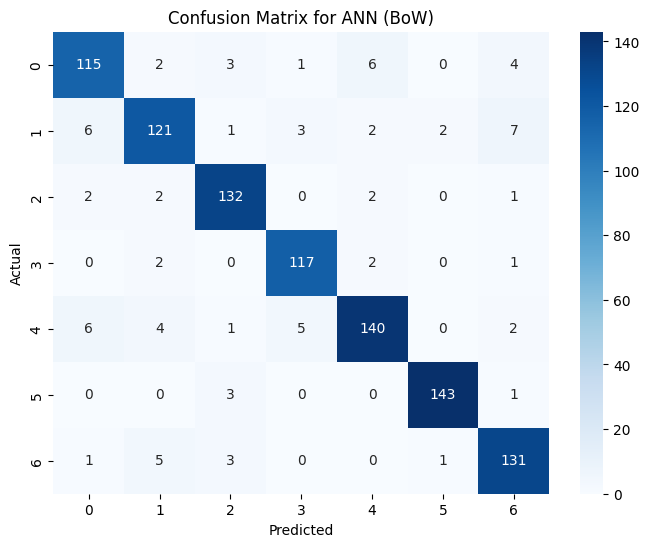

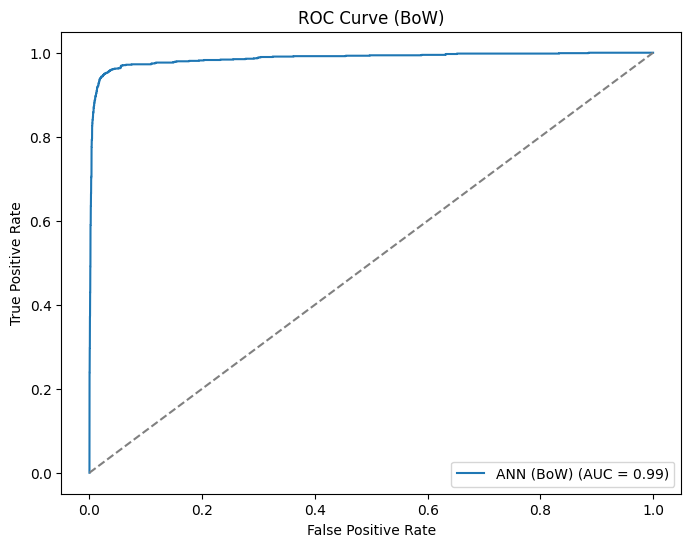

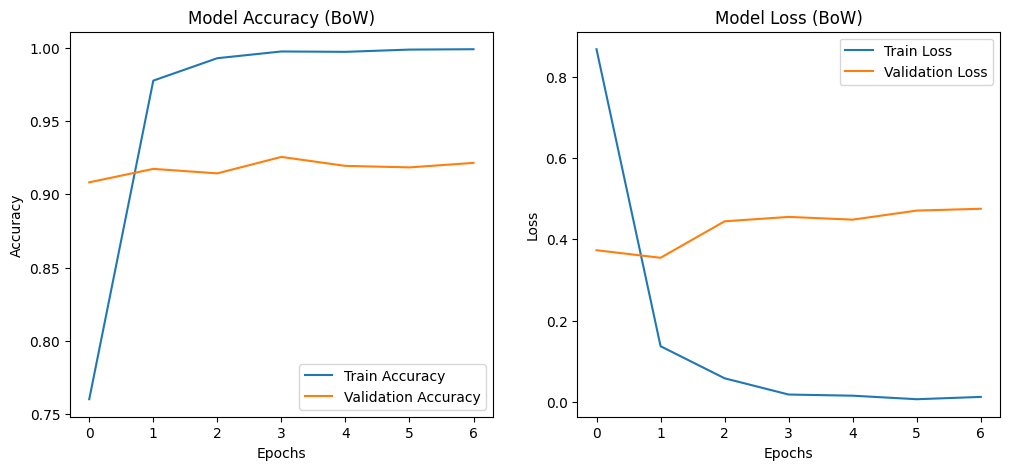


Eğitiliyor: TF-IDF
Epoch 1/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.4334 - loss: 1.7440 - val_accuracy: 0.9112 - val_loss: 0.5121
Epoch 2/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9517 - loss: 0.2831 - val_accuracy: 0.9173 - val_loss: 0.2736
Epoch 3/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9958 - loss: 0.0421 - val_accuracy: 0.9214 - val_loss: 0.2608
Epoch 4/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9975 - loss: 0.0220 - val_accuracy: 0.9245 - val_loss: 0.2629
Epoch 5/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9987 - loss: 0.0081 - val_accuracy: 0.9204 - val_loss: 0.2711
Epoch 6/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9992 - loss: 0.0079 - val_accuracy: 0.9255 - val_loss: 0.2689
Epoch 7/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9995 - loss: 0.0047 - val_accuracy: 0.9194 - val_loss: 0.2730
Epoch 8/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9990 - lo

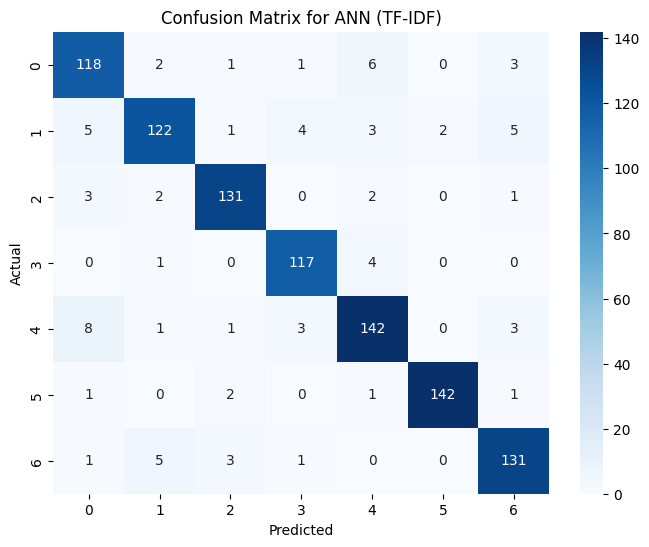

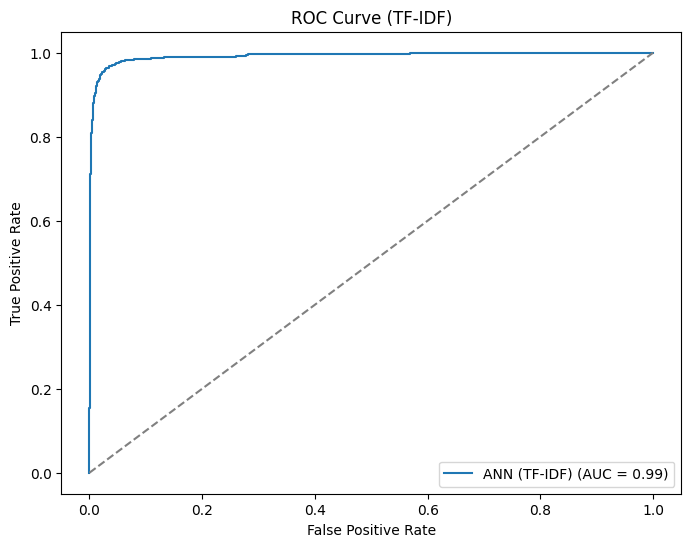

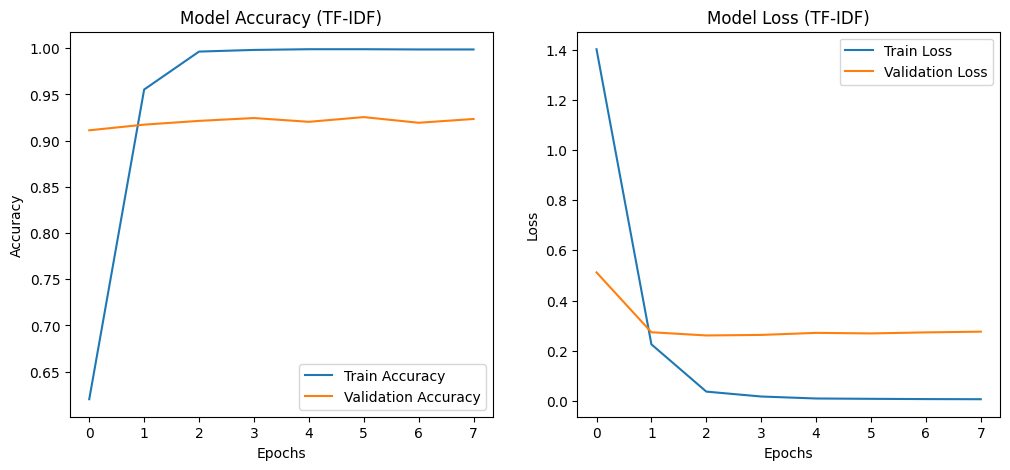


Eğitiliyor: Word2Vec
Epoch 1/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2336 - loss: 1.8774 - val_accuracy: 0.4173 - val_loss: 1.6312
Epoch 2/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3769 - loss: 1.6474 - val_accuracy: 0.4541 - val_loss: 1.4756
Epoch 3/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4394 - loss: 1.5194 - val_accuracy: 0.4806 - val_loss: 1.3967
Epoch 4/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4689 - loss: 1.4658 - val_accuracy: 0.4949 - val_loss: 1.3797
Epoch 5/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4665 - loss: 1.4611 - val_accuracy: 0.5224 - val_loss: 1.3088
Epoch 6/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4951 - loss: 1.3841 - val_accuracy: 0.5388 - val_loss: 1.2873
Epoch 7/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5155 - loss: 1.3531 - val_accuracy: 0.5398 - val_loss: 1.2724
Epoch 8/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5309 - loss: 1.3

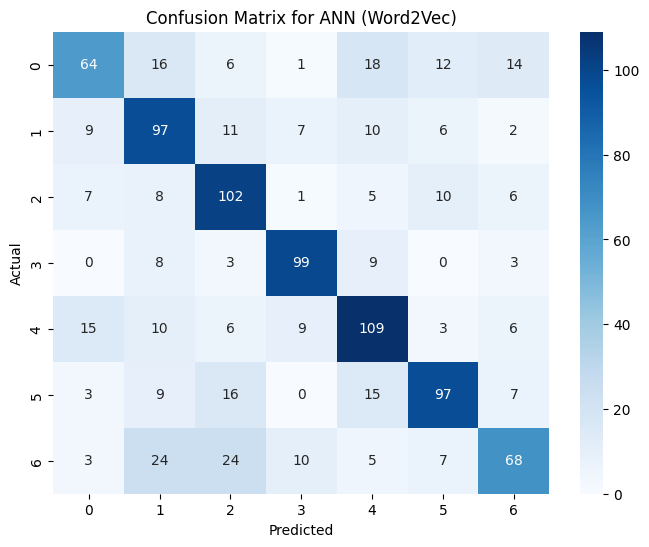

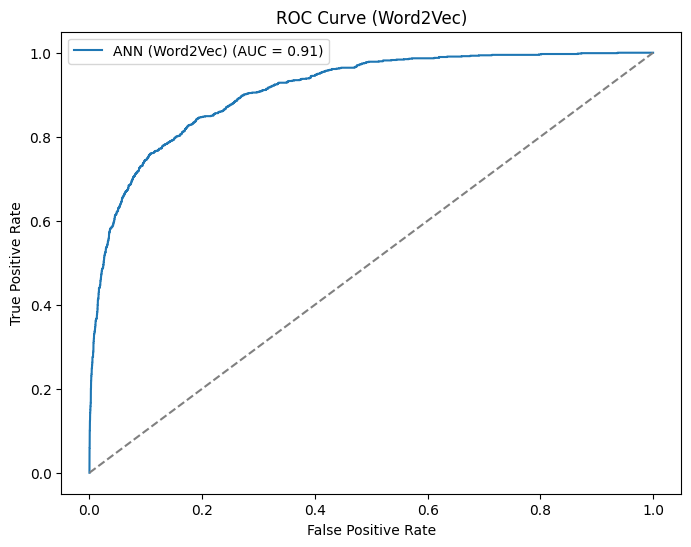

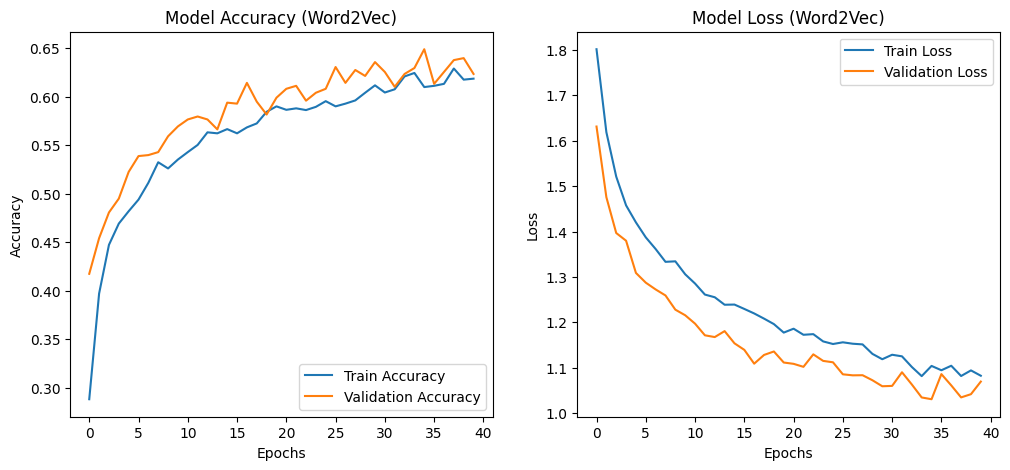


Final Sonuçlar:
ANN - BoW: {'Accuracy': 0.9173469387755102, 'Precision': 0.9173215166743852, 'Recall': 0.9173469387755102, 'F1-Score': 0.9171033183455696, 'AUC Score': 0.9867222071823943}
ANN - TF-IDF: {'Accuracy': 0.9214285714285714, 'Precision': 0.9218696783224568, 'Recall': 0.9214285714285714, 'F1-Score': 0.9214090437022149, 'AUC Score': 0.9914975915476841}
ANN - Word2Vec: {'Accuracy': 0.6489795918367347, 'Precision': 0.6524234881528745, 'Recall': 0.6489795918367347, 'F1-Score': 0.6457566442943354, 'AUC Score': 0.9088437824818649}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

# Kategori sütununu sayısallaştır
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Kategori etiketlerini ve karşılık gelen numaralarını yazdır
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Kategori Kodlama Haritası:")
for category, code in category_mapping.items():
    print(f"{code}: {category}")

# Feature setleri
feature_sets = {
    'BoW': X_bow,
    'TF-IDF': X_tfidf,
    'Word2Vec': X_w2v
}

# Tüm feature setleri için ANN modeli çalıştır
#results = {}
for feature_name, X in feature_sets.items():
    print(f"\nEğitiliyor: {feature_name}")

    # Veriyi eğitim ve test kümelerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, df['category_encoded'], test_size=0.2, random_state=42)

    # Convert X_train to float32 using toarray() if it's a sparse matrix
    if isinstance(X_train, scipy.sparse.spmatrix):
        X_train = X_train.toarray().astype('float32')
    if isinstance(X_test, scipy.sparse.spmatrix):
        X_test = X_test.toarray().astype('float32')

    # Veri türlerini float32'ye çevir
    y_train = y_train.astype('int32')
    y_test = y_test.astype('int32')

    # Yapay Sinir Ağı Modelini Tanımla
    model = Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),  # input_shape yerine Input() kullanıldı
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Modeli derle
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping callback tanımla
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Modeli eğit
    history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Modelin tahminlerini al
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_prob = model.predict(X_test)

    # Model performansını değerlendirme
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()

    # Çok sınıflı AUC hesaplaması için doğru formatı sağlıyoruz
    y_test_bin = pd.get_dummies(y_test).values  # Çok sınıflı etiketi binary formata çeviriyoruz
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    results[feature_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "AUC Score": auc,

    }
    print(f"{feature_name} Accuracy: {accuracy}")
    print(f"{feature_name} Precision: {precision}")
    print(f"{feature_name} Recall: {recall}")
    print(f"{feature_name} F1-Score: {f1_score}")
    print(f"{feature_name} AUC Score: {auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Confusion Matrix Görselleştirme
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for ANN ({feature_name})')
    plt.show()

    # ROC Curve Çizimi
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())  # Çok sınıflı ROC eğrisi için uygun format
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ANN ({feature_name}) (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({feature_name})')
    plt.legend()
    plt.show()

    # Accuracy ve Loss Grafikleri
    plt.figure(figsize=(12, 5))

    # Accuracy Grafiği
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model Accuracy ({feature_name})')
    plt.legend()

    # Loss Grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model Loss ({feature_name})')
    plt.legend()

    plt.show()

# Sonuçları Yazdır
print("\nFinal Sonuçlar:")
for feature_name, metrics in results.items():
    print(f"ANN - {feature_name}: {metrics}")


In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


          Accuracy  Precision    Recall  F1-Score  AUC Score
BoW       0.917347   0.917322  0.917347  0.917103   0.986722
TF-IDF    0.921429   0.921870  0.921429  0.921409   0.991498
Word2Vec  0.648980   0.652423  0.648980  0.645757   0.908844


In [ ]:
!pip install ace_tools # Install the missing module 'ace_tools' using pip.

Tüm Model Sonuçları:
            Model Feature Extraction  Accuracy  Precision  Recall  F1-Score  \
0             ANN                BoW    0.9112     0.9108  0.9112    0.9107   
1             ANN             TF-IDF    0.9204     0.9206  0.9204    0.9202   
2             ANN           Word2Vec    0.6224     0.6318  0.6224    0.6150   
3        LightGBM                BoW    0.8786     0.8809  0.8786    0.8789   
4        LightGBM             TF-IDF    0.8837     0.8850  0.8837    0.8836   
5        LightGBM           Word2Vec    0.6653     0.6666  0.6653    0.6657   
6         XGBoost                BoW    0.8684     0.8697  0.8684    0.8684   
7         XGBoost             TF-IDF    0.8673     0.8687  0.8673    0.8671   
8         XGBoost           Word2Vec    0.6816     0.6827  0.6816    0.6817   
9   Random Forest                BoW    0.8724     0.8763  0.8724    0.8728   
10  Random Forest             TF-IDF    0.8724     0.8750  0.8724    0.8725   
11  Random Forest           Wor

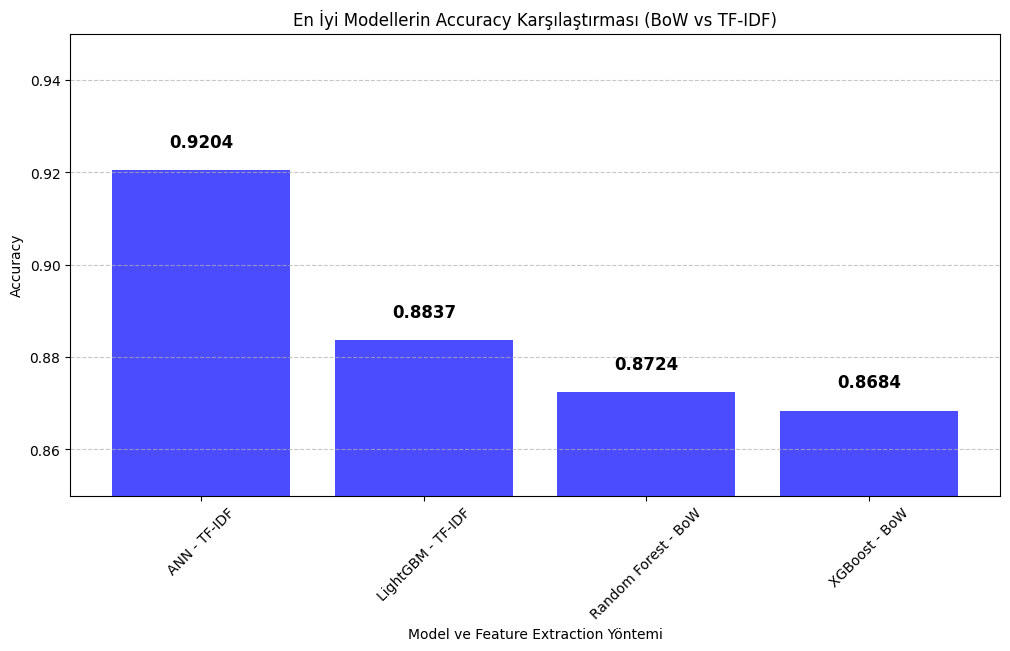

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Modellerin sonuçlarını içeren veri çerçevesini oluştur
data = [
    ["ANN", "BoW", 0.9112, 0.9108, 0.9112, 0.9107, 0.9867],
    ["ANN", "TF-IDF", 0.9204, 0.9206, 0.9204, 0.9202, 0.9912],
    ["ANN", "Word2Vec", 0.6224, 0.6318, 0.6224, 0.6150, 0.9072],
    ["LightGBM", "BoW", 0.8786, 0.8809, 0.8786, 0.8789, 0.9861],
    ["LightGBM", "TF-IDF", 0.8837, 0.8850, 0.8837, 0.8836, 0.9846],
    ["LightGBM", "Word2Vec", 0.6653, 0.6666, 0.6653, 0.6657, 0.9292],
    ["XGBoost", "BoW", 0.8684, 0.8697, 0.8684, 0.8684, 0.9824],
    ["XGBoost", "TF-IDF", 0.8673, 0.8687, 0.8673, 0.8671, 0.9804],
    ["XGBoost", "Word2Vec", 0.6816, 0.6827, 0.6816, 0.6817, 0.9269],
    ["Random Forest", "BoW", 0.8724, 0.8763, 0.8724, 0.8728, 0.9864],
    ["Random Forest", "TF-IDF", 0.8724, 0.8750, 0.8724, 0.8725, 0.9855],
    ["Random Forest", "Word2Vec", 0.6582, 0.6580, 0.6582, 0.6575, 0.9167]
]

columns = ["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"]
df = pd.DataFrame(data, columns=columns)

# Her model için en yüksek accuracy'ye sahip satırı seç
best_models = df.loc[df.groupby("Model")["Accuracy"].idxmax()]

# Veri çerçevelerini göster
print("Tüm Model Sonuçları:")
print(df)

print("\nEn İyi Modellerin Karşılaştırması:")
print(best_models)

# Histogram çizimi (Model ve Feature Extraction bilgilerini içerecek şekilde)
plt.figure(figsize=(12, 6))
bars = plt.bar(best_models["Model"] + " - " + best_models["Feature Extraction"], best_models["Accuracy"], color='blue', alpha=0.7)
plt.xlabel("Model ve Feature Extraction Yöntemi")
plt.ylabel("Accuracy")
plt.title("En İyi Modellerin Accuracy Karşılaştırması (BoW vs TF-IDF)")

# Accuracy değerlerini çubukların üstüne yazdır
for bar, acc in zip(bars, best_models["Accuracy"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.4f}",
             ha='center', fontsize=12, fontweight='bold')

plt.ylim(0.85, 0.95)  # Görselliği artırmak için sınırlar
plt.xticks(rotation=45)  # X ekseni etiketlerini döndürerek daha okunabilir hale getirme
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


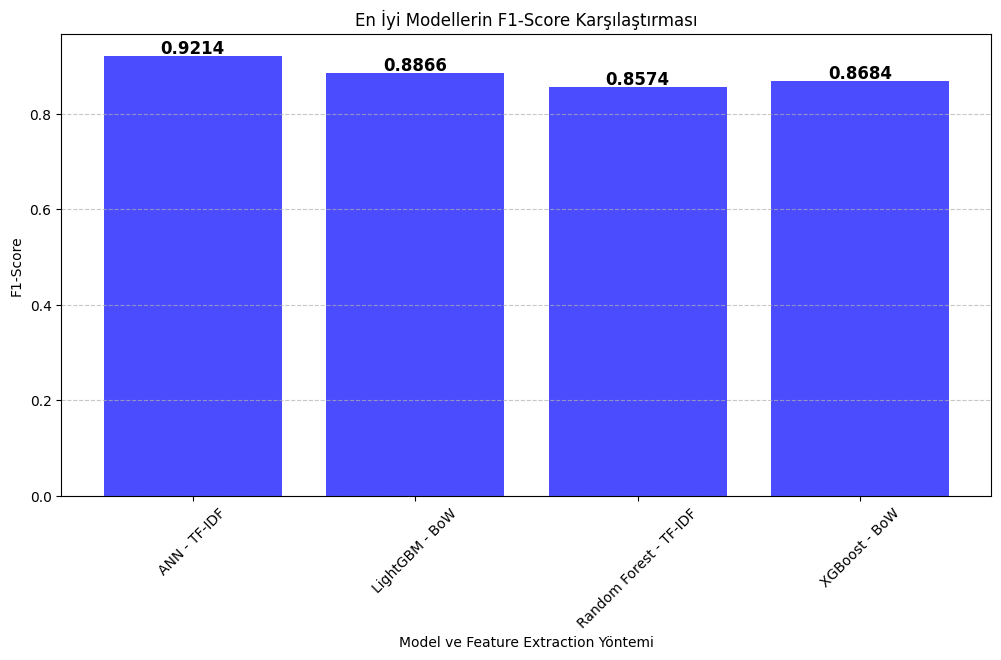

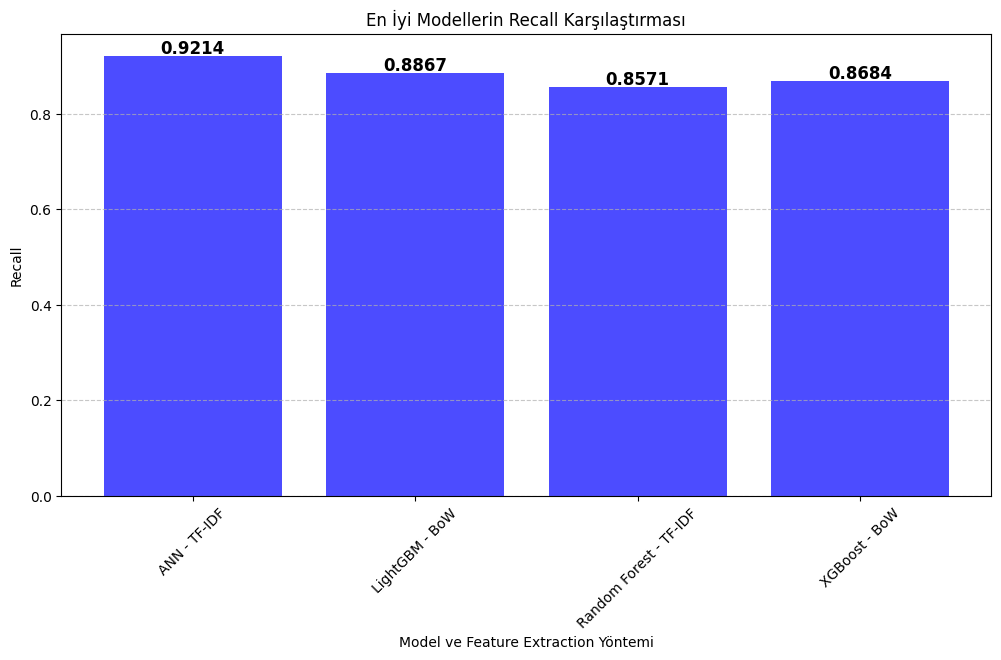

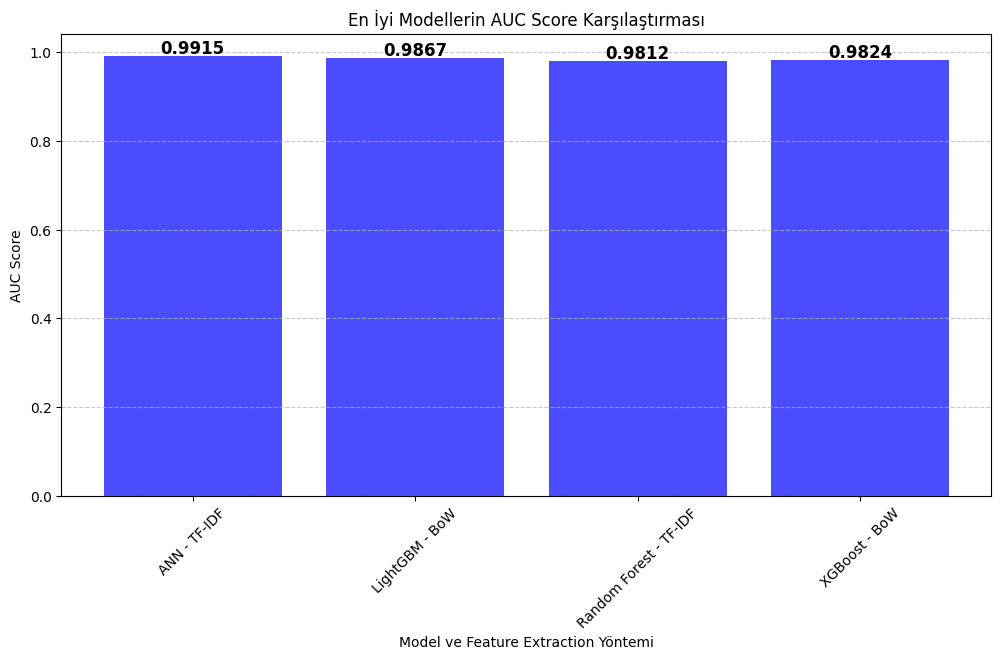

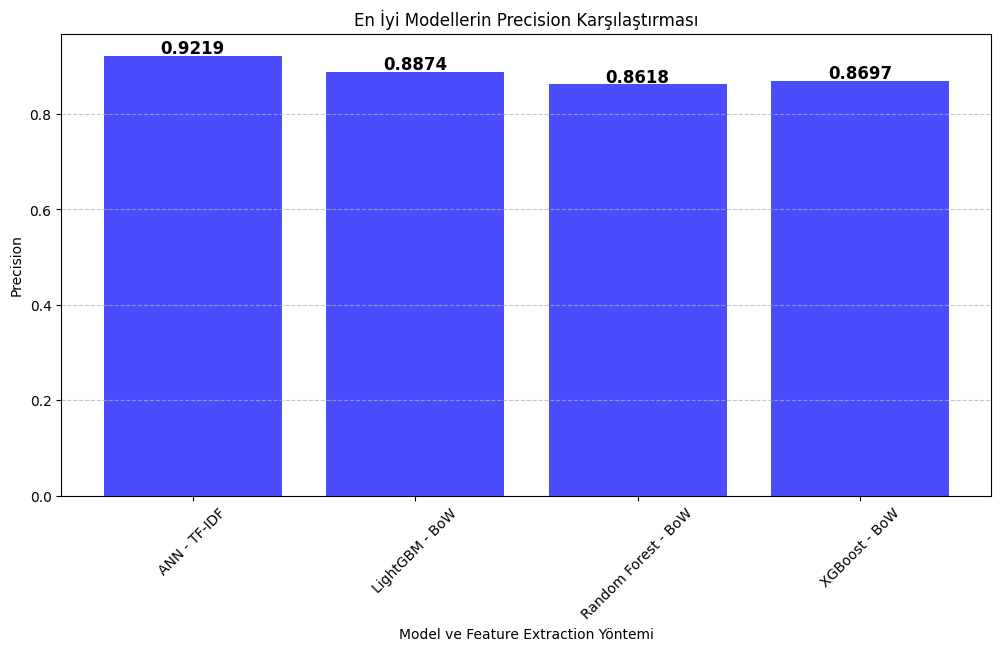

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Yeni model sonuçlarını içeren veri çerçevesini oluştur
new_data = [
    ["ANN", "BoW", 0.9173, 0.9173, 0.9173, 0.9171, 0.9867],
    ["ANN", "TF-IDF", 0.9214, 0.9219, 0.9214, 0.9214, 0.9915],
    ["ANN", "Word2Vec", 0.6490, 0.6524, 0.6490, 0.6458, 0.9088],
    ["LightGBM", "BoW", 0.8867, 0.8874, 0.8867, 0.8866, 0.9867],
    ["LightGBM", "TF-IDF", 0.8847, 0.8856, 0.8847, 0.8846, 0.9852],
    ["LightGBM", "Word2Vec", 0.6714, 0.6712, 0.6714, 0.6710, 0.9290],
    ["XGBoost", "BoW", 0.8684, 0.8697, 0.8684, 0.8684, 0.9824],
    ["XGBoost", "TF-IDF", 0.8673, 0.8687, 0.8673, 0.8671, 0.9804],
    ["XGBoost", "Word2Vec", 0.6755, 0.6750, 0.6755, 0.6751, 0.9278],
    ["Random Forest", "BoW", 0.8561, 0.8618, 0.8561, 0.8571, 0.9801],
    ["Random Forest", "TF-IDF", 0.8571, 0.8601, 0.8571, 0.8574, 0.9812],
    ["Random Forest", "Word2Vec", 0.6469, 0.6456, 0.6469, 0.6457, 0.9127]
]

columns = ["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"]
df_new = pd.DataFrame(new_data, columns=columns)

# Her model için en yüksek F1-Score'a sahip satırı seç
best_models_f1 = df_new.loc[df_new.groupby("Model")["F1-Score"].idxmax()]

# Her model için en yüksek Recall'a sahip satırı seç
best_models_recall = df_new.loc[df_new.groupby("Model")["Recall"].idxmax()]

# Her model için en yüksek AUC Score'a sahip satırı seç
best_models_auc = df_new.loc[df_new.groupby("Model")["AUC Score"].idxmax()]

# Her model için en yüksek Precision'a sahip satırı seç
best_models_precision = df_new.loc[df_new.groupby("Model")["Precision"].idxmax()]

# Histogram çizim fonksiyonu
def plot_histogram(dataframe, metric_name):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(dataframe["Model"] + " - " + dataframe["Feature Extraction"], dataframe[metric_name], color='blue', alpha=0.7)
    plt.xlabel("Model ve Feature Extraction Yöntemi")
    plt.ylabel(metric_name)
    plt.title(f"En İyi Modellerin {metric_name} Karşılaştırması")

    # Değerleri çubukların üstüne yazdır
    for bar, val in zip(bars, dataframe[metric_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{val:.4f}",
                 ha='center', fontsize=12, fontweight='bold')

    plt.xticks(rotation=45)  # X ekseni etiketlerini döndürerek daha okunabilir hale getirme
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Histogramları çizdir
plot_histogram(best_models_f1, "F1-Score")
plot_histogram(best_models_recall, "Recall")
plot_histogram(best_models_auc, "AUC Score")
plot_histogram(best_models_precision, "Precision")


**2. kısım**

In [ ]:
from google.colab import drive
# Google Drive'ı bağlama
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Türkçe stopwords'leri indir
nltk.download('stopwords')
stop_words = set(stopwords.words("turkish"))

# Veri setini yükleme
file_path = '/content/drive/MyDrive/7allV03.csv'
df = pd.read_csv(file_path)

# Metinlerin temizlenmesi ve işlenmesi
X_list = []  # Metinleri saklamak için liste
for text in df['text']:  # 'text' sütunundaki veriyi al
    text = text.lower()  # Küçük harfe çevir
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]", " ", text)  # Türkçe karakterler dışındakileri temizle
    text = text.split()  # Kelimelere ayır
    text = [word for word in text if word not in stop_words]  # Stopwords kaldır
    text = " ".join(text)  # Kelimeleri tekrar birleştir
    X_list.append(text)

# Kategorileri işleme
y_label = df['category'].tolist()  # Kategori sütununu listeye çevir

# Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X_list, y_label, test_size=0.2, random_state=42, shuffle=True)

# Eğitim ve test veri sayısını kontrol edelim
print("Eğitim veri sayısı:", len(X_train))
print("Eğitim etiket sayısı:", len(y_train))
print("Test veri sayısı:", len(X_test))
print("Test etiket sayısı:", len(y_test))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Eğitim veri sayısı: 3920
Eğitim etiket sayısı: 3920
Test veri sayısı: 980
Test etiket sayısı: 980


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Maksimum sekans uzunluğunu belirleyelim
max_length = 100  # Cümleleri 100 kelimeyle sınırlandıralım

# Tokenizer'ı oluştur ve eğitim verisine uygula
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Kelime indeksi sözlüğünü oluştur
word_index = tokenizer.word_index  # Eğitim verisindeki kelimeleri numaralandır

# Metinleri sayısal dizilere dönüştür
sequences_train = tokenizer.texts_to_sequences(X_train)  # Kelimeleri numaralara çevir
sequences_test = tokenizer.texts_to_sequences(X_test)  # Test verisini de numaralara çevir

# Maksimum uzunluğa göre padding uygulayarak tüm dizileri eşit uzunlukta hale getir
X_train_padded = pad_sequences(sequences_train, padding='post', maxlen=max_length)  # Eğitim seti
X_test_padded = pad_sequences(sequences_test, padding='post', maxlen=max_length)  # Test seti

# Kelime sayısını yazdıralım
print("Kelime sözlüğü uzunluğu:", len(word_index))

# Yeni veri formatlarını kontrol edelim
print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)

Kelime sözlüğü uzunluğu: 94836
X_train_padded shape: (3920, 100)
X_test_padded shape: (980, 100)


In [ ]:
# Eğitim veri setini kontrol edelim
print("Original Version:", X_train[0])
print("---------------------------------")
print("Padded version", X_train_padded[0])
print("---------------------------------")
print("Tokenized version:", sequences_train[0])
print("---------------------------------")
print("Shape after the padding:", X_train_padded.shape)

# Test veri setini tokenize ve pad edelim
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, padding="post", maxlen=max_length)

# Test veri setini kontrol edelim
print("Original Version:", X_test[0])
print("---------------------------------")
print("Padded version", X_test_padded[0])
print("---------------------------------")
print("Tokenized version:", X_test_sequences[0])
print("---------------------------------")
print("Shape after the padding:", X_test_padded.shape)


Original Version: internet e plorer un son versiyonu hazırlanıyor microsoft internet e plorer tarayıcısının son sürümünü milyondan fazla bilgisayar kullanıcısına ulaştırmak son hazırlıklarını yapıyor microsoft ürettikleri işletim sistemlerinden bilgisayar kullanıcıları tarafından tercih edilen indo s kullanıcılarının internet e plorer tarayıcısını kullanabileceğini bildirdi indo s kullanıcıları geçen yılın kasım ayının ortalarından itibaren internet e plorer un ön sürümünü internetten yükleyebiliyor internet e plorer un son sürümü indo s kullanıcılarına otomatik güncelleme olarak gönderilecek son tarayıcının kasım ayında piyasaya sürülen indo s e sahip bilgisayarların içine kurulduğu belirtildi
---------------------------------
Padded version [  113    27  8057    50    20  7270  2457  1162   113    27  8057 37497
    20 18044  3903    52   671 18045 13109    20  5572   631  1162 11186
  1428 24119   671  2458    33   471   151  1445   187  2904   113    27
  8057 54140 37498   282  14

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense, Dropout, Flatten, BatchNormalization, Input, concatenate
from tensorflow.keras.models import Model

# Kelime sayısı ve embedding boyutu
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200  # Word2Vec ile uyumlu olacak şekilde belirledik

# Giriş katmanı
input_layer = Input(shape=(max_length,))

# Rastgele başlatılmış embedding
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(input_layer)

# CNN Katmanı
cnn_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)

# BiLSTM Katmanı
bilstm_layer = Bidirectional(LSTM(64, return_sequences=True))(cnn_layer)

# GRU Katmanı
gru_layer = GRU(64, return_sequences=True)(bilstm_layer)

# LSTM Katmanı
lstm_layer = LSTM(64)(gru_layer)

# Dropout ve BatchNormalization
dropout_layer = Dropout(0.5)(lstm_layer)
batch_norm_layer = BatchNormalization()(dropout_layer)

# Tam Bağlantılı (Dense) Katman
dense_layer = Dense(64, activation='relu')(batch_norm_layer)
dense_layer = BatchNormalization()(dense_layer)
dense_layer = Dropout(0.3)(dense_layer)

# Çıktı Katmanı (7 sınıf için softmax)
output_layer = Dense(7, activation='softmax')(dense_layer)

# Modeli oluştur
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Modeli derleme
ensemble_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model özetini yazdırma
ensemble_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 200)            │      18,967,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 48, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 48, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,269,743 (73.51 MB)

 Trainable params: 19,269,487 (73.51 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
import gensim as GN
import numpy as np

# Tokenize edilmiş cümleler oluştur
tokenized_sentences = [text.split() for text in X_list]  # Güncellenmiş ön işleme sonrası veri kullanıldı

# Word2Vec modelini eğit
w2v_model = GN.models.Word2Vec(sentences=tokenized_sentences, vector_size=200, window=5, min_count=2, workers=4)

# Her metin için ortalama Word2Vec vektörünü hesaplayan fonksiyon
def get_w2v_vector(text, model, vector_size=200):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)  # Eğer kelime yoksa sıfır vektörü dön
    return np.mean(word_vectors, axis=0)

# Tüm veri için Word2Vec vektörlerini çıkar
X_w2v = np.array([get_w2v_vector(text, w2v_model, 200) for text in X_list])

print("Word2Vec vektörleri oluşturuldu.")


Word2Vec vektörleri oluşturuldu.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Random_Embedding (Embedding)         │ ?                           │      18,967,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,967,400 (72.35 MB)

 Trainable params: 18,967,400 (72.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.1517 - loss: 2.4226 - val_accuracy: 0.2204 - val_loss: 1.9545
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2932 - loss: 1.7873 - val_accuracy: 0.4571 - val_loss: 1.4045
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7172 - loss: 0.7777 - val_accuracy: 0.6898 - val_loss: 0.8686
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9392 - loss: 0.2129 - val_accuracy: 0.7724 - val_loss: 0.8144
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9927 - loss: 0.0463 - val_accuracy: 0.7561 - val_loss: 0.9713
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9989 - loss: 0.0123 - val_accuracy: 0.7847 - val_loss: 0.9143
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9987 - loss: 0.0077 - val_accuracy: 0.7776 - val_loss: 0.9793
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9976 - loss: 0.0105 - val_accuracy: 0.7704 - 

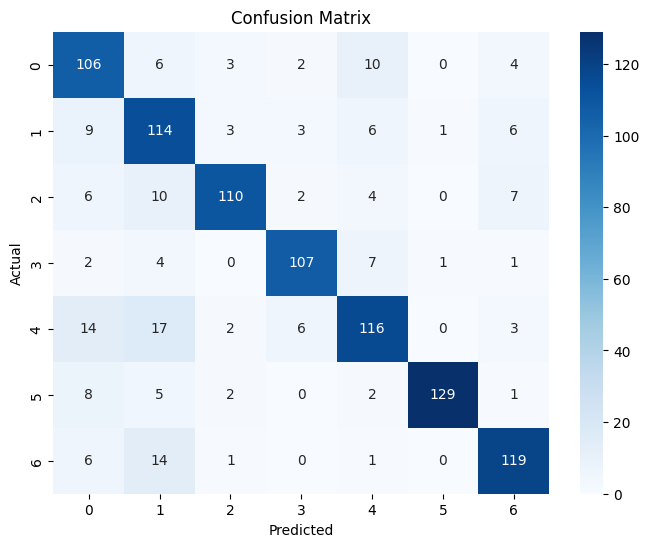

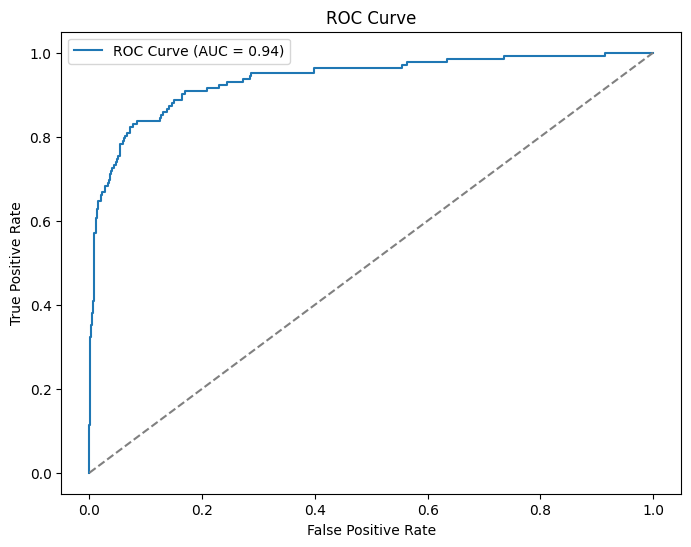

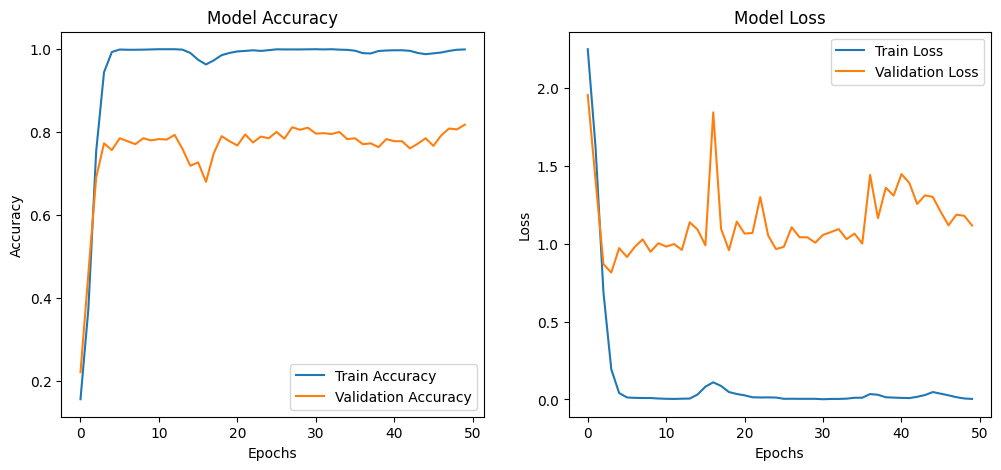

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Dropout, BatchNormalization, Flatten

# Kelime sayısını ve embedding boyutunu belirle
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200  # Word2Vec boyutuna göre ayarlandı

# Rastgele başlatılmış embedding matrisi oluştur
random_embedding_matrix = np.random.uniform(-1, 1, (vocab_size, embedding_dim))

# Word2Vec embedding matrisini oluştur
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Modeli oluştur
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=200, weights=[random_embedding_matrix], trainable=True, name="Random_Embedding"),

    Conv1D(filters=128, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),

    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dropout(0.3),
    BatchNormalization(),

    Flatten(),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(7, activation='softmax')
])

# Modeli derle
adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

# Etiketleri numpy array formatına çevir ve veri tiplerini güncelle
X_train_padded = np.array(X_train_padded, dtype=np.float32)
X_test_padded = np.array(X_test_padded, dtype=np.float32)

# Kategorik etiketleri sayısallaştır
label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train)  # String etiketleri sayılara çevir
y_test_label = label_encoder.transform(y_test)  # Test seti için de aynı dönüşümü uygula

# NumPy array formatına dönüştür ve int32 veri tipine getir
y_train_label = np.array(y_train_label, dtype=np.int32).reshape(-1, 1)
y_test_label = np.array(y_test_label, dtype=np.int32).reshape(-1, 1)

# Modeli eğit
num_epochs = 50
BATCH_SIZE = 64
history = model.fit(X_train_padded, y_train_label, batch_size=BATCH_SIZE, epochs=num_epochs, validation_data=(X_test_padded, y_test_label))

# Modelin tahminlerini al
y_pred = np.argmax(model.predict(X_test_padded), axis=1)
y_prob = model.predict(X_test_padded)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test_label, y_pred)
precision, recall, f1_score, _ = classification_report(y_test_label, y_pred, output_dict=True)['weighted avg'].values()
auc = roc_auc_score(y_test_label.ravel(), y_prob, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("AUC Score:", auc)
print("Classification Report:\n", classification_report(y_test_label, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_label, y_pred))

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_label, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Çizimi
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test_label, classes=np.unique(y_test_label))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Plot ROC curve for a specific class (e.g., class 1)
plt.figure(figsize=(8, 6))
plt.plot(fpr[1], tpr[1], label=f'ROC Curve (AUC = {roc_auc[1]:.2f})') # Change the class index if needed
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Accuracy ve Loss Grafikleri
plt.figure(figsize=(12, 5))

# Accuracy Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


3. Kısım

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00
   ━━

In [ ]:
!rm -rf apex
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" .

Cloning into 'apex'...
remote: Enumerating objects: 11945, done.
remote: Counting objects: 100% (3697/3697), done.
remote: Compressing objects: 100% (542/542), done.
remote: Total 11945 (delta 3427), reused 3155 (delta 3155), pack-reused 8248 (from 3)
Receiving objects: 100% (11945/11945), 15.65 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (8325/8325), done.
/content/apex
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
DEPRECATION: --build-option and --global-option are deprecated. pip 24.2 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-6enve1t0
  Entered build tracker: /tmp/pip-build-tracker

In [ ]:
from google.colab import drive
# Google Drive'ı bağlama
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, log_loss
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# GPU kontrolü
print("PyTorch Version:", torch.__version__)
print("GPU Available:", torch.cuda.is_available())

# Veri setini yükleme
file_path = '/content/drive/MyDrive/7allV03.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Kategorileri sayısallaştırma
df['labels'] = pd.factorize(df['category'])[0]
df.head()



PyTorch Version: 2.5.1+cu121
GPU Available: True


,category,text,labels
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,0
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,0
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...,0
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,0
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...,0


In [ ]:
# Eğitim ve test setlerine ayırma
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape





((3920, 3), (980, 3))

In [ ]:
# BERT Modelini Tanımlama
model = ClassificationModel(
    'bert',
    'bert-base-multilingual-uncased',
    num_labels = len(train['category'].unique()),
    use_cuda=torch.cuda.is_available(),
    args={
        'reprocess_input_data': True,
        'overwrite_output_dir': True,
        'num_train_epochs': 3
    }
)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

In [ ]:
# Modeli eğitme
model.train_model(train)



  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/490 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/490 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/490 [00:00<?, ?it/s]

(1470, 0.4408601015603461)

In [ ]:

# Modeli değerlendirme
result, model_outputs, wrong_predictions = model.eval_model(test)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
predictions = model_outputs.argmax(axis=1)
actuals = test.labels.values

Accuracy: 0.9092
Precision: 0.9089
Recall: 0.9092
F1 Score: 0.9089

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       158
           1       0.86      0.85      0.85       131
           2       0.87      0.86      0.86       142
           3       0.96      0.93      0.94       139
           4       0.94      0.98      0.96       122
           5       0.96      0.99      0.97       147
           6       0.88      0.90      0.89       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980



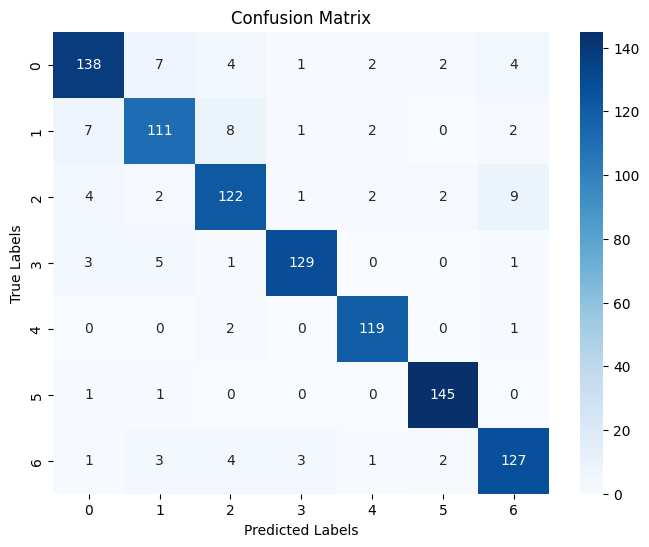

AUC (ROC Curve): 0.9863
Log Loss: 1.0457



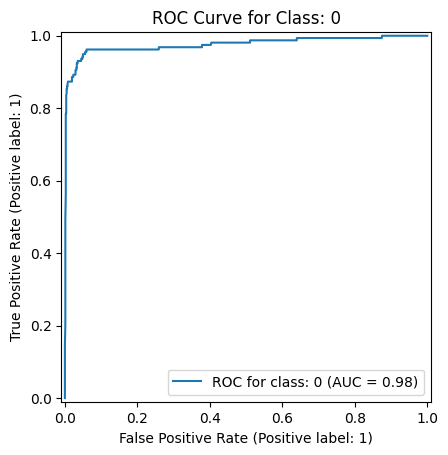

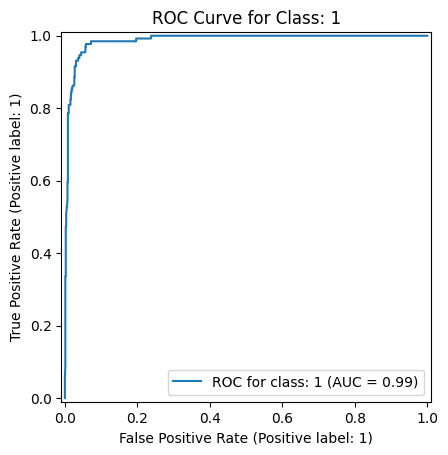

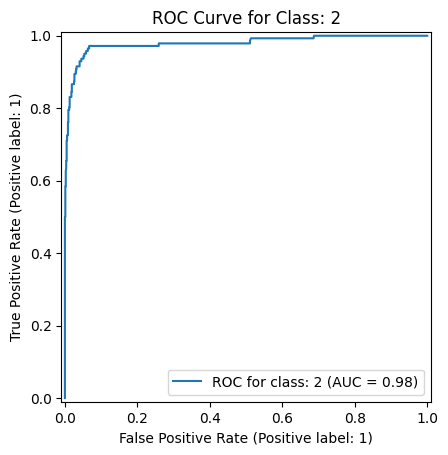

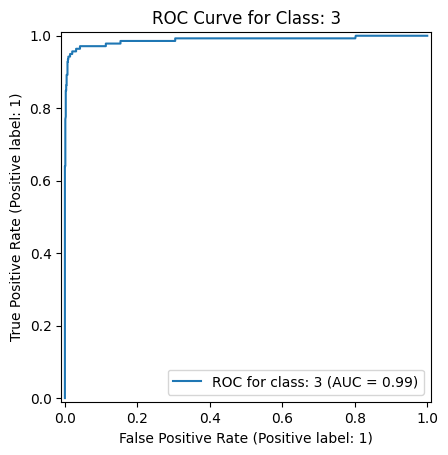

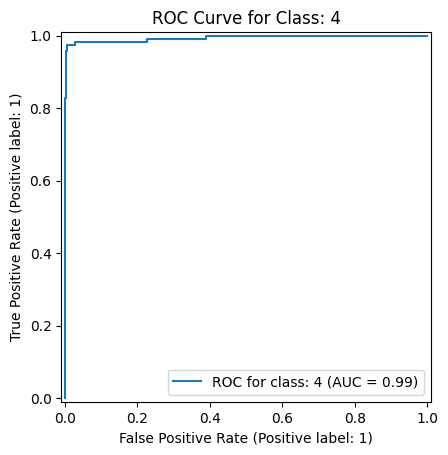

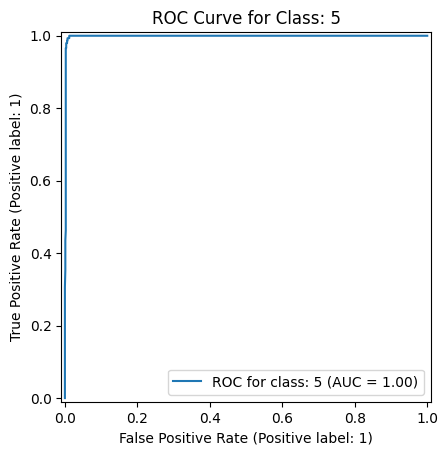

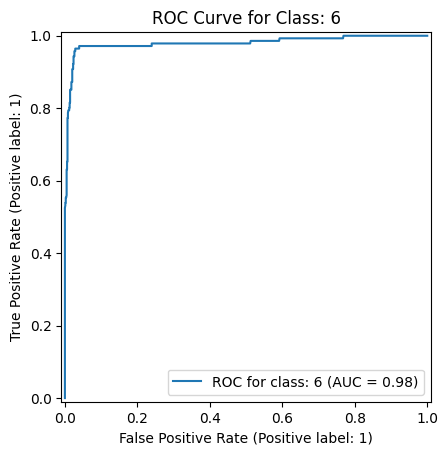

In [ ]:
# Model performans metrikleri
print(f"Accuracy: {accuracy_score(actuals, predictions):.4f}")
print(f"Precision: {precision_score(actuals, predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(actuals, predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(actuals, predictions, average='weighted'):.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(actuals, predictions))

# Confusion Matrix
cm = confusion_matrix(actuals, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC (ROC) ve Log Loss hesaplama
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(actuals)
print(f"AUC (ROC Curve): {roc_auc_score(y_test_binarized, model_outputs, multi_class='ovr'):.4f}")
print(f"Log Loss: {log_loss(y_test_binarized, model_outputs):.4f}\n")

# ROC Curve çizimi
for i, class_label in enumerate(lb.classes_):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i], model_outputs[:, i],
        name=f"ROC for class: {class_label}"
    )
    plt.title(f"ROC Curve for Class: {class_label}")
    plt.show()

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, log_loss
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
from torch.nn.functional import softmax
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report, log_loss
)
from torch.utils.data import Dataset

In [ ]:
# Veri setini yükleme
file_path = '/content/drive/MyDrive/7allV03.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Kategorileri sayısallaştırma
df['labels'] = pd.factorize(df['category'])[0]



In [ ]:

# Eğitim ve test setlerine ayırma
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_samples = train['text'].tolist()
train_targets = train['labels'].tolist()
test_samples = test['text'].tolist()
test_targets = test['labels'].tolist()

# Tokenizer ve model yükleme
model_name = "savasy/bert-turkish-text-classification"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/751 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
# Dataset sınıfı
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# Eğitim ve test verilerini tokenize etme
train_encodings = tokenizer(train_samples, truncation=True, padding=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(test_samples, truncation=True, padding=True, max_length=128, return_tensors="pt")

train_data = TextDataset(train_encodings, train_targets)
test_data = TextDataset(test_encodings, test_targets)



In [ ]:
# Eğitim ve değerlendirme ayarları
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    run_name="finish"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=tokenizer
)



In [ ]:
# Modeli eğitme
trainer.train()



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.228700,0.246920
2,0.144000,0.235906
3,0.075500,0.218876


TrainOutput(global_step=1470, training_loss=0.17831253510880835, metrics={'train_runtime': 533.246, 'train_samples_per_second': 22.054, 'train_steps_per_second': 2.757, 'total_flos': 773581229568000.0, 'train_loss': 0.17831253510880835, 'epoch': 3.0})

In [ ]:
# Modeli değerlendirme
results = trainer.evaluate()
print("Final Results:", results)



Final Results: {'eval_loss': 0.21887578070163727, 'eval_runtime': 6.5116, 'eval_samples_per_second': 150.502, 'eval_steps_per_second': 18.889, 'epoch': 3.0}


Accuracy: 0.9663
Precision: 0.9668
Recall: 0.9663
F1 Score: 0.9665

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       158
           1       0.95      0.96      0.95       131
           2       0.92      0.95      0.94       142
           3       1.00      0.97      0.99       139
           4       0.99      0.98      0.98       122
           5       0.99      1.00      1.00       147
           6       0.94      0.96      0.95       141

    accuracy                           0.97       980
   macro avg       0.97      0.97      0.97       980
weighted avg       0.97      0.97      0.97       980



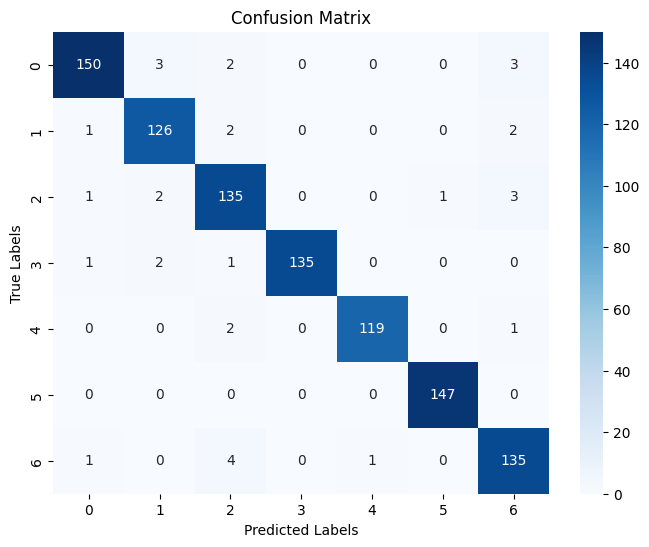

AUC (ROC Curve): 0.9954
Log Loss: 0.2189



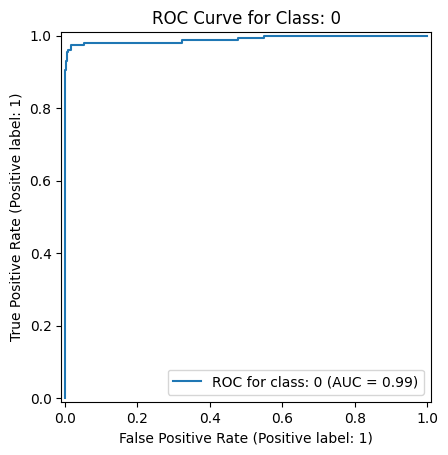

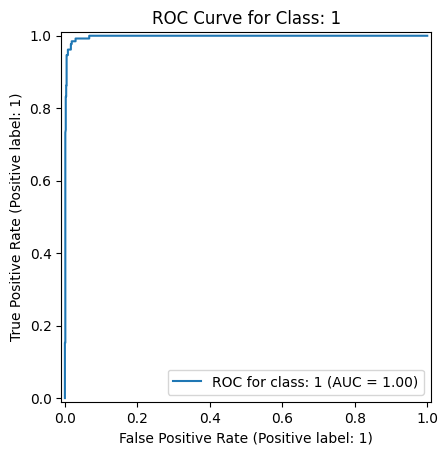

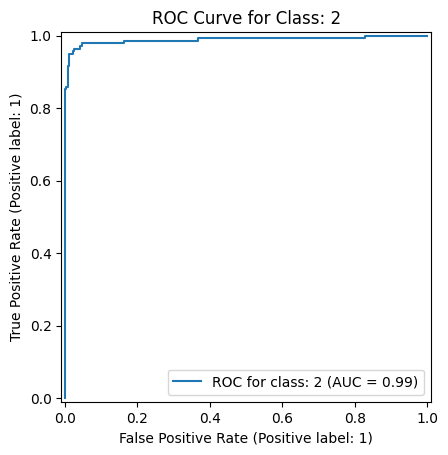

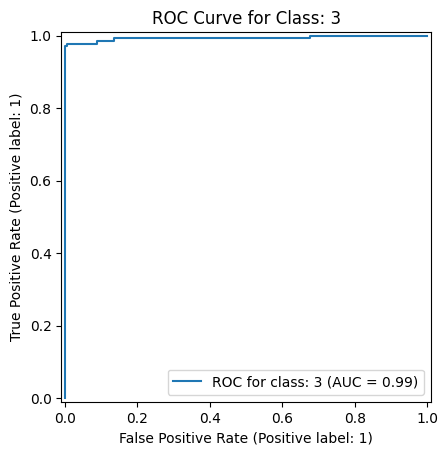

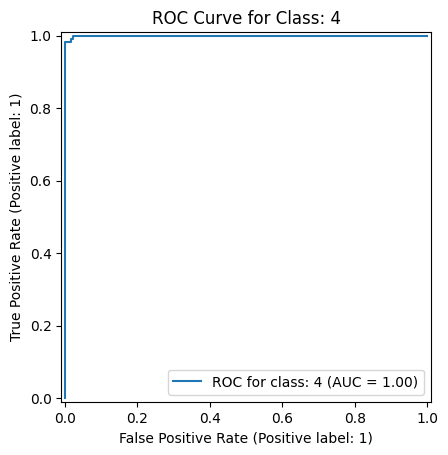

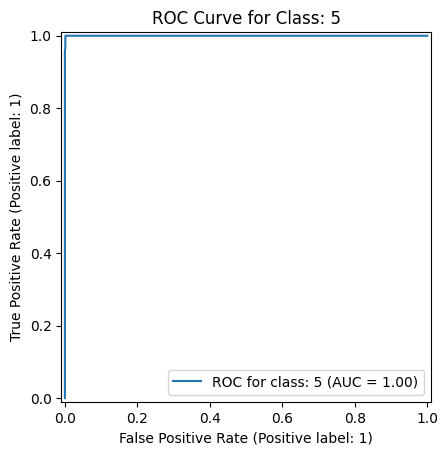

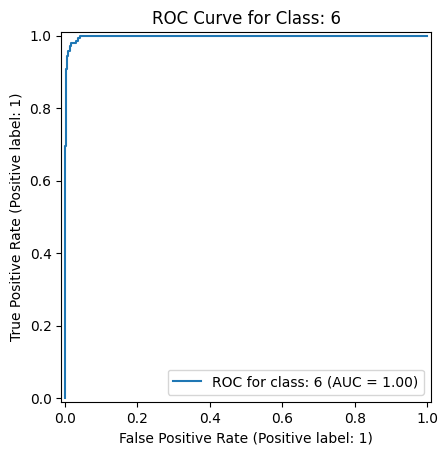

In [ ]:


# Tahminleri al
predictions = trainer.predict(test_data)
predicted_labels = np.argmax(predictions.predictions, axis=1)
predicted_probs = torch.nn.functional.softmax(torch.tensor(predictions.predictions), dim=1).numpy()

# Gerçek etiketler
true_labels = np.array(test_targets)

# Model performans metrikleri
print(f"Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}")
print(f"Precision: {precision_score(true_labels, predicted_labels, average='weighted'):.4f}")
print(f"Recall: {recall_score(true_labels, predicted_labels, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(true_labels, predicted_labels, average='weighted'):.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC (ROC) ve Log Loss hesaplama
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(true_labels)
print(f"AUC (ROC Curve): {roc_auc_score(y_test_binarized, predicted_probs, multi_class='ovr'):.4f}")
print(f"Log Loss: {log_loss(y_test_binarized, predicted_probs):.4f}\n")

# ROC Curve çizimi
for i, class_label in enumerate(lb.classes_):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i], predicted_probs[:, i],
        name=f"ROC for class: {class_label}"
    )
    plt.title(f"ROC Curve for Class: {class_label}")
    plt.show()

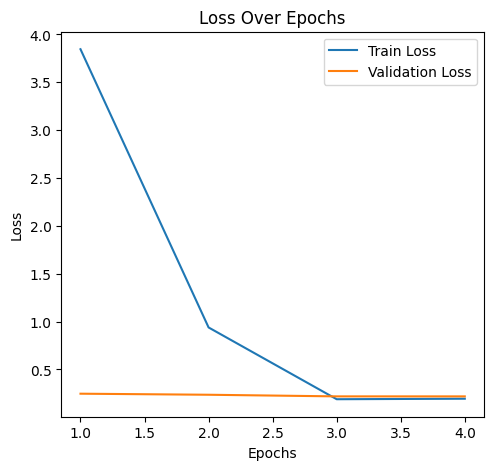

In [ ]:
# Loss ve Accuracy Grafikleri
training_history = trainer.state.log_history
train_loss = [log['loss'] for log in training_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in training_history if 'eval_loss' in log]

# Epoch sayısını en küçük loss dizisinin uzunluğuna eşitle
min_epochs = min(len(train_loss), len(eval_loss))
epochs = range(1, min_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss[:min_epochs], label='Train Loss')
plt.plot(epochs, eval_loss[:min_epochs], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Accuracy Grafiği
train_acc = [log['eval_accuracy'] for log in training_history if 'eval_accuracy' in log]
if train_acc:
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Over Epochs')
    plt.legend()

plt.show()


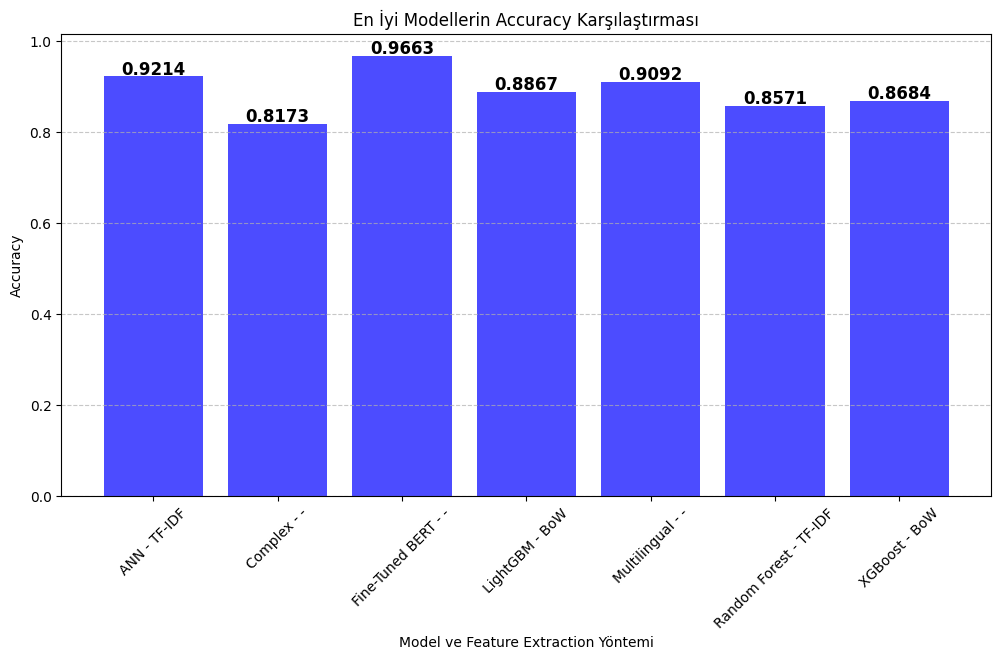

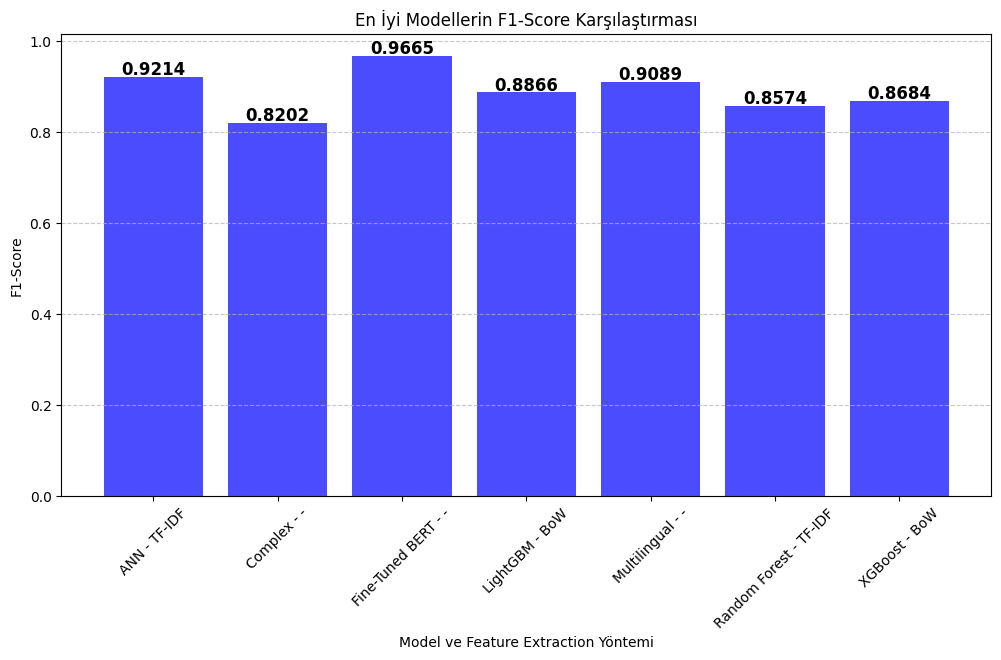

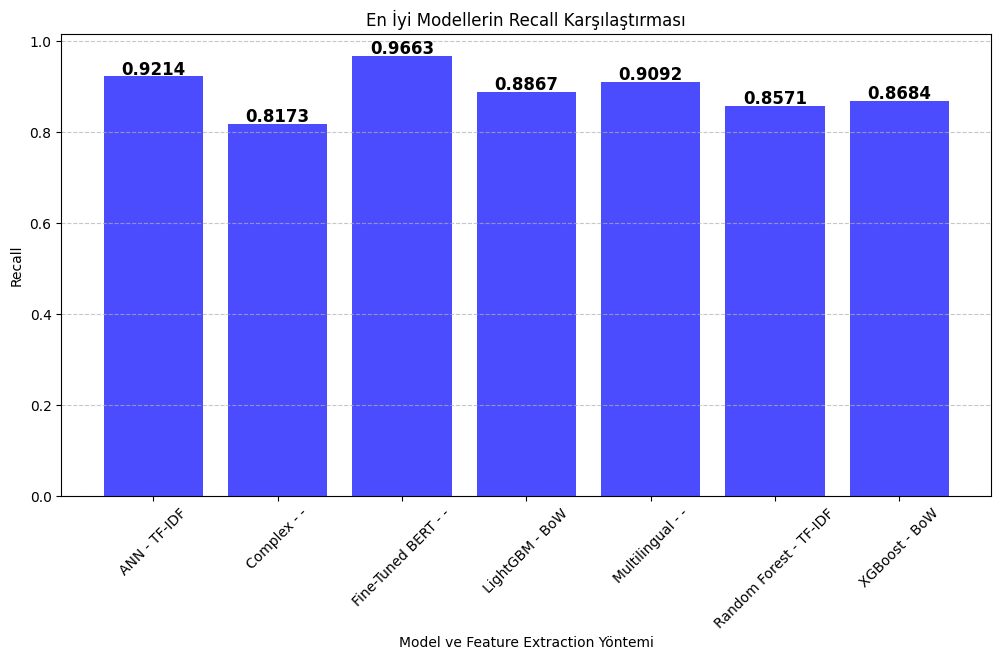

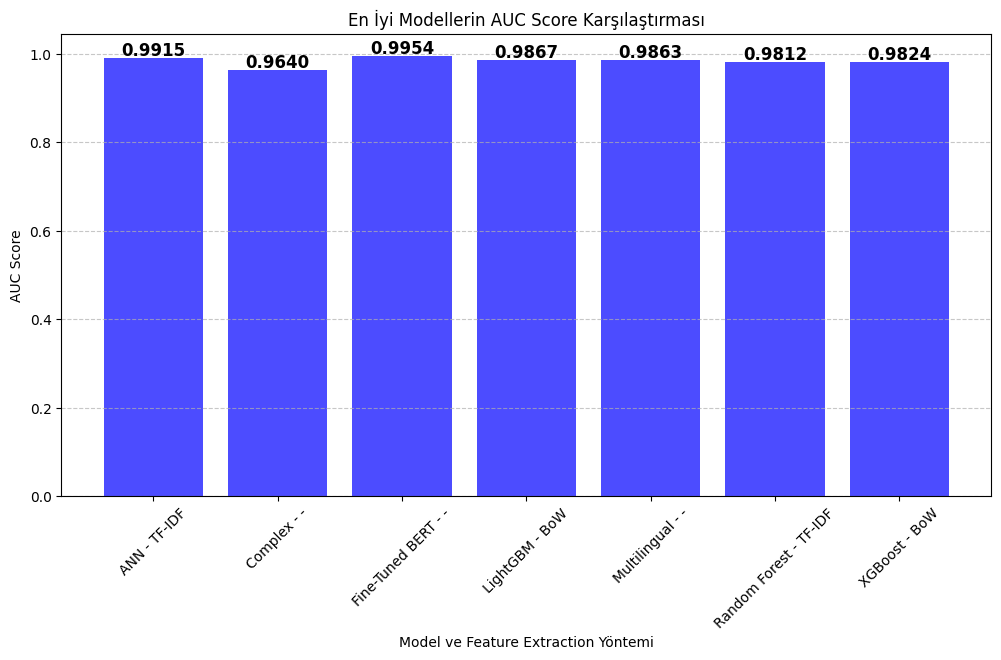

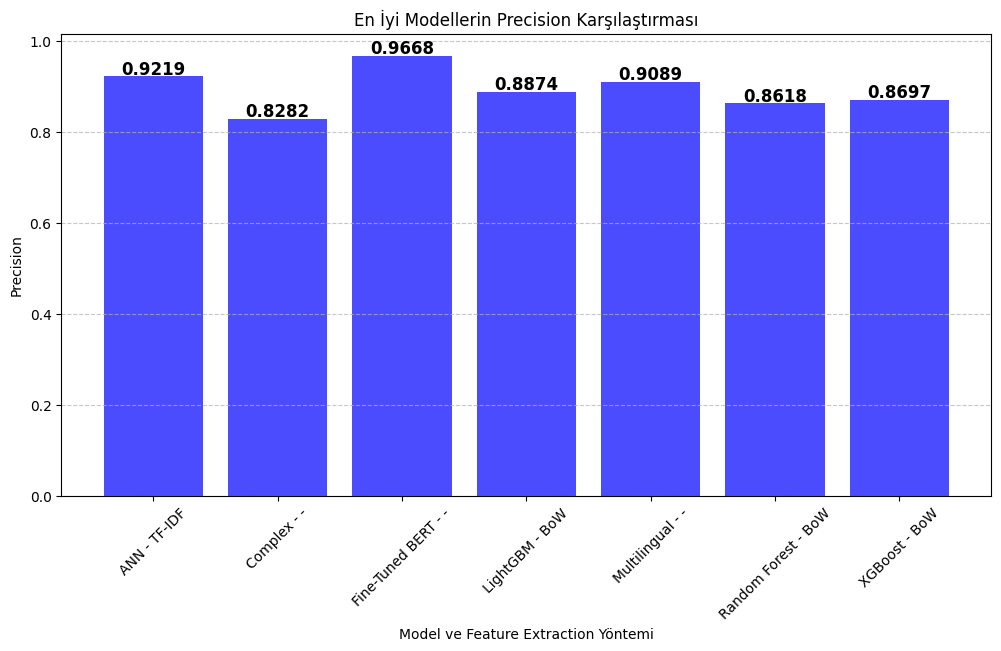

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Yeni model sonuçlarını içeren veri çerçevesini oluştur ve Complex, Multilingual ve Fine-Tuned BERT modellerini ekleyelim
new_data = [
    ["ANN", "BoW", 0.9173, 0.9173, 0.9173, 0.9171, 0.9867],
    ["ANN", "TF-IDF", 0.9214, 0.9219, 0.9214, 0.9214, 0.9915],
    ["ANN", "Word2Vec", 0.6490, 0.6524, 0.6490, 0.6458, 0.9088],
    ["LightGBM", "BoW", 0.8867, 0.8874, 0.8867, 0.8866, 0.9867],
    ["LightGBM", "TF-IDF", 0.8847, 0.8856, 0.8847, 0.8846, 0.9852],
    ["LightGBM", "Word2Vec", 0.6714, 0.6712, 0.6714, 0.6710, 0.9290],
    ["XGBoost", "BoW", 0.8684, 0.8697, 0.8684, 0.8684, 0.9824],
    ["XGBoost", "TF-IDF", 0.8673, 0.8687, 0.8673, 0.8671, 0.9804],
    ["XGBoost", "Word2Vec", 0.6755, 0.6750, 0.6755, 0.6751, 0.9278],
    ["Random Forest", "BoW", 0.8561, 0.8618, 0.8561, 0.8571, 0.9801],
    ["Random Forest", "TF-IDF", 0.8571, 0.8601, 0.8571, 0.8574, 0.9812],
    ["Random Forest", "Word2Vec", 0.6469, 0.6456, 0.6469, 0.6457, 0.9127],
    ["Complex", "-", 0.8173, 0.8282, 0.8173, 0.8202, 0.9640],
    ["Multilingual", "-", 0.9092, 0.9089, 0.9092, 0.9089, 0.9863],
    ["Fine-Tuned BERT", "-", 0.9663, 0.9668, 0.9663, 0.9665, 0.9954]
]

columns = ["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"]
df_new = pd.DataFrame(new_data, columns=columns)

# Her model için en yüksek Accuracy'ye sahip satırı seç
best_models_accuracy = df_new.loc[df_new.groupby("Model")["Accuracy"].idxmax()]

# Her model için en yüksek F1-Score'a sahip satırı seç
best_models_f1 = df_new.loc[df_new.groupby("Model")["F1-Score"].idxmax()]

# Her model için en yüksek Recall'a sahip satırı seç
best_models_recall = df_new.loc[df_new.groupby("Model")["Recall"].idxmax()]

# Her model için en yüksek AUC Score'a sahip satırı seç
best_models_auc = df_new.loc[df_new.groupby("Model")["AUC Score"].idxmax()]

# Her model için en yüksek Precision'a sahip satırı seç
best_models_precision = df_new.loc[df_new.groupby("Model")["Precision"].idxmax()]

# Histogram çizim fonksiyonu
def plot_histogram(dataframe, metric_name):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(dataframe["Model"] + " - " + dataframe["Feature Extraction"], dataframe[metric_name], color='blue', alpha=0.7)
    plt.xlabel("Model ve Feature Extraction Yöntemi")
    plt.ylabel(metric_name)
    plt.title(f"En İyi Modellerin {metric_name} Karşılaştırması")

    # Değerleri çubukların üstüne yazdır
    for bar, val in zip(bars, dataframe[metric_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{val:.4f}",
                 ha='center', fontsize=12, fontweight='bold')

    plt.xticks(rotation=45)  # X ekseni etiketlerini döndürerek daha okunabilir hale getirme
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Histogramları çizdir
plot_histogram(best_models_accuracy, "Accuracy")
plot_histogram(best_models_f1, "F1-Score")
plot_histogram(best_models_recall, "Recall")
plot_histogram(best_models_auc, "AUC Score")
plot_histogram(best_models_precision, "Precision")
